In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn. feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn. linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Load dataset
data=pd.read_csv("/Users/maitri/Documents/ml internship/datasets for research/dreaddit-train.csv")

In [3]:
#EDA
# Basic statistics 
print(data.head(20)) 
print(data.info()) 
print(data.describe())

    EntryID     SubredditName  PostID  \
0       896     relationships  7nu7as   
1     19059           anxiety  680i6d   
2      7977              ptsd  8eeu1t   
3      1214              ptsd  8d28vu   
4      1965     relationships  7r1e85   
5       850        assistance  7py440   
6      1643          homeless  9e8zyg   
7     39090           anxiety  71ma4y   
8     19468    almosthomeless  6d5p34   
9     48595  domesticviolence  83d7jt   
10     1039  survivorsofabuse  7fvr4o   
11      588              ptsd  8o7ecd   
12    53256              ptsd  7vhnbx   
13    39650  domesticviolence  5q0sh9   
14      414  domesticviolence  9y3go5   
15     1824     relationships  7rc73v   
16      813  domesticviolence  8uv4cw   
17      745           anxiety  6f4swf   
18      895           anxiety  6f4swf   
19     1361           anxiety  8dllx7   

                                             PostText  CategoryLabel  \
0   Its like that, if you want or not.“ ME: I have...             

In [4]:
listC=data.columns[:-1]
print(listC)

Index(['EntryID', 'SubredditName', 'PostID', 'PostText', 'CategoryLabel',
       'LabelConfidence', 'PostTimestamp', 'KarmaPoints', 'ReadabilityARI',
       'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
       'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore',
       'UpvoteRatio', 'NumComments', 'FKGradeLevel'],
      dtype='object')


In [25]:
# id: A unique identifier for each entry or post.
# subreddit: The name of the subreddit where the post was made.
# post_id: A unique identifier for the post.
# sentence_range: The range of sentences within the post being referred to.
# text: The actual content of the post.
# label: A category or classification label assigned to the post.
# confidence: The confidence level of the assigned label, typically ranging from 0 to 1, indicating the probability or certainty of the classification.
# social_timestamp: The timestamp of when the post was made, typically in Unix epoch time format.
# social_karma: The karma points associated with the post, which is a measure of its popularity or reception within the community.
# syntax_ari: The Automated Readability Index (ARI) score of the text, indicating the readability level of the content.
# lex_dal_min_pleasantness: The minimum pleasantness score of the text based on the Dictionary of Affect in Language (DAL) lexicon.
# lex_dal_min_activation: The minimum activation (arousal) score of the text based on the DAL lexicon.
# lex_dal_min_imagery: The minimum imagery score of the text based on the DAL lexicon.
# lex_dal_avg_activation: The average activation (arousal) score of the text based on the DAL lexicon.
# lex_dal_avg_imagery: The average imagery score of the text based on the DAL lexicon.
# lex_dal_avg_pleasantness: The average pleasantness score of the text based on the DAL lexicon.
# social_upvote_ratio: The ratio of upvotes to downvotes for the post, indicating its overall reception.
# social_num_comments: The number of comments the post has received.
# syntax_fk_grade: The Flesch-Kincaid grade level of the text, indicating the readability level based on US school grade levels.
# sentiment: The sentiment score of the text, indicating the overall positive or negative sentiment expressed in the content.

In [9]:
data.head(5)

EntryID  SubredditName  PostID  \
0      896  relationships  7nu7as   
1    19059        anxiety  680i6d   
2     7977           ptsd  8eeu1t   
3     1214           ptsd  8d28vu   
4     1965  relationships  7r1e85   

                                            PostText  CategoryLabel  \
0  Its like that, if you want or not.“ ME: I have...              0   
1  I man the front desk and my title is HR Custom...              0   
2  We'd be saving so much money with this new hou...              1   
3  My ex used to shoot back with "Do you want me ...              1   
4  I haven’t said anything to him yet because I’m...              0   

   LabelConfidence  PostTimestamp  KarmaPoints  ReadabilityARI  \
0              0.8   1.514981e+09           22       -1.238793   
1              1.0   1.493348e+09            5        7.684583   
2              1.0   1.524517e+09           10        2.360408   
3              0.5   1.524018e+09            5        5.997000   
4              0.8   1.516200e+09          138        4.649418   

   MinPleasantnessScore  MinActivationScore  MinImageryScore  \
0                1.0000              1.2000              1.0   
1                1.4000              1.1250              1.0   
2                1.1429              1.0000              1.0   
3                1.0000              1.3000              1.0   
4                1.1250              1.1429              1.0   

   AvgActivationScore  AvgImageryScore  AvgPleasantnessScore  UpvoteRatio  \
0             1.65864          1.32245               1.80264         0.63   
1             1.69133          1.69180               1.97249         1.00   
2             1.70974          1.52985               1.86108         1.00   
3             1.72615          1.52000               1.84909         1.00   
4             1.75642          1.43582               1.91725         0.84   

   NumComments  FKGradeLevel  SentimentScore  
0           62     -0.148707        0.000000  
1            2      7.398222       -0.065909  
2            8      3.149288       -0.036818  
3            7      6.606000       -0.066667  
4           70      4.801869        0.141667

In [11]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/maitri/Documents/ml internship/datasets for research/dreaddit-train.csv'  
df = pd.read_csv(file_path)

# List of important columns to keep
important_columns = [
    'id', 'subreddit', 'post_id', 'text', 'label', 'confidence', 
    'social_timestamp', 'social_karma', 'syntax_ari', 
    'lex_dal_min_pleasantness', 'lex_dal_min_activation', 
    'lex_dal_min_imagery', 'lex_dal_avg_activation', 
    'lex_dal_avg_imagery', 'lex_dal_avg_pleasantness', 
    'social_upvote_ratio', 'social_num_comments', 
    'syntax_fk_grade', 'sentiment'
]

# Select only the important columns
data = df[important_columns]

# Dictionary mapping old column names to new column names
new_column_names = {
    'id': 'EntryID',
    'subreddit': 'SubredditName',
    'post_id': 'PostID',
    'text': 'PostText',
    'label': 'CategoryLabel',
    'confidence': 'LabelConfidence',
    'social_timestamp': 'PostTimestamp',
    'social_karma': 'KarmaPoints',
    'syntax_ari': 'ReadabilityARI',
    'lex_dal_min_pleasantness': 'MinPleasantnessScore',
    'lex_dal_min_activation': 'MinActivationScore',
    'lex_dal_min_imagery': 'MinImageryScore',
    'lex_dal_avg_activation': 'AvgActivationScore',
    'lex_dal_avg_imagery': 'AvgImageryScore',
    'lex_dal_avg_pleasantness': 'AvgPleasantnessScore',
    'social_upvote_ratio': 'UpvoteRatio',
    'social_num_comments': 'NumComments',
    'syntax_fk_grade': 'FKGradeLevel',
    'sentiment': 'SentimentScore'
}

# Rename columns in the reduced DataFrame
data.rename(columns=new_column_names, inplace=True)

# Print the DataFrame with new column names
print(data)

# Save the modified DataFrame to a new CSV file (optional)
output_file_path = '/Users/maitri/Documents/ml internship/datasets for research/dreaddit-train.csv'  
data.to_csv(output_file_path, index=False)


KeyError: "None of [Index(['id', 'subreddit', 'post_id', 'text', 'label', 'confidence',\n       'social_timestamp', 'social_karma', 'syntax_ari',\n       'lex_dal_min_pleasantness', 'lex_dal_min_activation',\n       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',\n       'lex_dal_avg_pleasantness', 'social_upvote_ratio',\n       'social_num_comments', 'syntax_fk_grade', 'sentiment'],\n      dtype='object')] are in the [columns]"

In [13]:
important_columns = [
    'SubredditName', 'PostID', 'PostText', 'EntryID',
    'CategoryLabel', 'LabelConfidence', 'PostTimestamp', 'KarmaPoints',
    'ReadabilityARI', 'AvgPleasantnessScore', 'UpvoteRatio', 'NumComments',
    'SentimentScore'
]

# Keep only the important columns
df = data[important_columns]

# Display the reduced DataFrame
df

SubredditName  PostID                                           PostText  \
0    relationships  7nu7as  Its like that, if you want or not.“ ME: I have...   
1          anxiety  680i6d  I man the front desk and my title is HR Custom...   
2             ptsd  8eeu1t  We'd be saving so much money with this new hou...   
3             ptsd  8d28vu  My ex used to shoot back with "Do you want me ...   
4    relationships  7r1e85  I haven’t said anything to him yet because I’m...   
..             ...     ...                                                ...   
710           ptsd  7vavh4  i have horrible vivid nightmares every night. ...   
711  relationships  7oeyuc  Also I can't think about both of them without ...   
712  relationships  7ssxec  Furthermore, I told him before we got really s...   
713     assistance  90bila  Here's the link to my amazon wish list where t...   
714     assistance  7uueuc  How can I keep us protected? They have already...   

     EntryID  CategoryLabel  LabelConfidence  PostTimestamp  KarmaPoints  \
0        896              0         0.800000   1.514981e+09           22   
1      19059              0         1.000000   1.493348e+09            5   
2       7977              1         1.000000   1.524517e+09           10   
3       1214              1         0.500000   1.524018e+09            5   
4       1965              0         0.800000   1.516200e+09          138   
..       ...            ...              ...            ...          ...   
710    24271              1         1.000000   1.517790e+09            7   
711     2212              1         0.571429   1.515192e+09            0   
712    27951              1         0.600000   1.516849e+09            3   
713     1164              0         0.600000   1.532048e+09           18   
714     1519              1         0.000000   1.517605e+09            4   

     ReadabilityARI  AvgPleasantnessScore  UpvoteRatio  NumComments  \
0         -1.238793               1.80264         0.63           62   
1          7.684583               1.97249         1.00            2   
2          2.360408               1.86108         1.00            8   
3          5.997000               1.84909         1.00            7   
4          4.649418               1.91725         0.84           70   
..              ...                   ...          ...          ...   
710        4.597368               1.84112         0.79           15   
711        1.452083               1.83530         0.50            7   
712        3.956447               1.85501         0.72           10   
713        0.236814               1.90766         0.74            2   
714        3.221250               1.90820         0.63            8   

     SentimentScore  
0          0.000000  
1         -0.065909  
2         -0.036818  
3         -0.066667  
4          0.141667  
..              ...  
710       -0.075000  
711        0.189286  
712       -0.044444  
713        0.090000  
714        0.136364  

[715 rows x 13 columns]

In [33]:
print(df.isnull().sum())

SubredditName           0
PostID                  0
PostText                0
EntryID                 0
CategoryLabel           0
LabelConfidence         0
PostTimestamp           0
KarmaPoints             0
ReadabilityARI          0
AvgPleasantnessScore    0
UpvoteRatio             0
NumComments             0
SentimentScore          0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


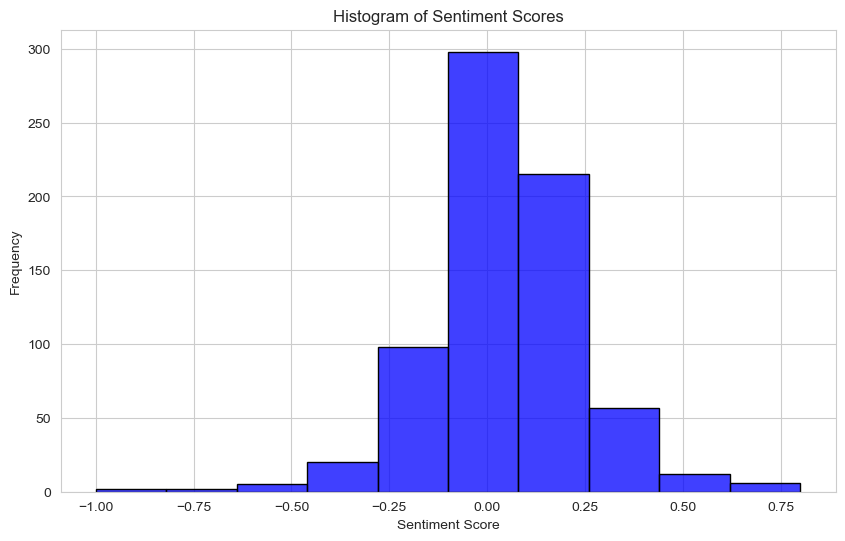

In [15]:
# Plot histogram for SentimentScore
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['SentimentScore'], bins=10, edgecolor='black',color='b',kde=False)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Analyze the sentiment scores
sentiment_scores = df['SentimentScore']
mean_score = sentiment_scores.mean()
median_score = sentiment_scores.median()
std_dev = sentiment_scores.std()

print(f"Mean Sentiment Score: {mean_score:.2f}")
print(f"Median Sentiment Score: {median_score:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Mean Sentiment Score: 0.05
Median Sentiment Score: 0.04
Standard Deviation: 0.19


In [19]:
# SentimentScore is a strong candidate for histogram analysis as it directly relates to emotional content 
# and can provide insights into how sentiment varies across posts.
# kde=False keeps the histogram focused on showing the raw distribution of the data without additional smoothing or abstraction

In [21]:
#    > Since the sentiment score is close to zero, it indicates that most of the sentiments are either neutral or only slightly positive.

#    > mean and median are similar indicates that the data distribution is fairly symmetric and not heavily skewed towards 
#      higher or lower values.

#    >This measures the amount of variability or spread in the sentiment scores around the mean. 

#    >A standard deviation of 0.20 means that most of the sentiment scores fall within 0.20 units of the mean score (0.04).

#    >The average sentiment score is 0.04, which is close to zero. This indicates that, 
#      on average, the sentiment is nearly neutral (neither very positive nor very negative).



#    >With a standard deviation of 0.20, most of the sentiment scores are within the range of:
#     Mean−Standard Deviation
#         = 0.04−0.20 = −0.16
#
#    Mean+Standard Deviation
#     = 0.04+0.20 = 0.24
#   So, the sentiment scores typically range from -0.16 to 0.24.


In [15]:
print(df.columns)

Index(['SubredditName', 'PostID', 'PostText', 'EntryID', 'CategoryLabel',
       'LabelConfidence', 'PostTimestamp', 'KarmaPoints', 'ReadabilityARI',
       'AvgPleasantnessScore', 'UpvoteRatio', 'NumComments', 'SentimentScore'],
      dtype='object')


   EntryID  SubredditName  PostID  \
0      896  relationships  7nu7as   
1    19059        anxiety  680i6d   
2     7977           ptsd  8eeu1t   
3     1214           ptsd  8d28vu   
4     1965  relationships  7r1e85   

                                            PostText  CategoryLabel  \
0  Its like that, if you want or not.“ ME: I have...              0   
1  I man the front desk and my title is HR Custom...              0   
2  We'd be saving so much money with this new hou...              1   
3  My ex used to shoot back with "Do you want me ...              1   
4  I haven’t said anything to him yet because I’m...              0   

   LabelConfidence  PostTimestamp  KarmaPoints  ReadabilityARI  \
0              0.8   1.514981e+09           22       -1.238793   
1              1.0   1.493348e+09            5        7.684583   
2              1.0   1.524517e+09           10        2.360408   
3              0.5   1.524018e+09            5        5.997000   
4              0.8  

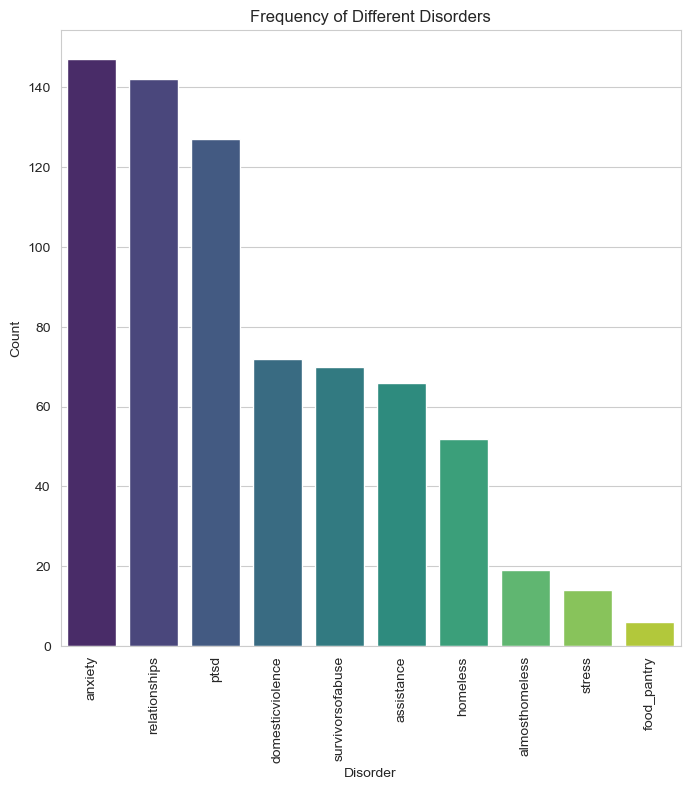

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV
df = pd.read_csv('/Users/maitri/Documents/ml internship/datasets for research/dreaddit-train.csv')  

# Check the first few rows to confirm the column names
print(df.head())

# Count occurrences of each disorder in the 'subreddit' column
disorder_counts = df['SubredditName'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 8))
sns.barplot(x=disorder_counts.index, y=disorder_counts.values, palette='viridis')
plt.title('Frequency of Different Disorders')
plt.xlabel('Disorder')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


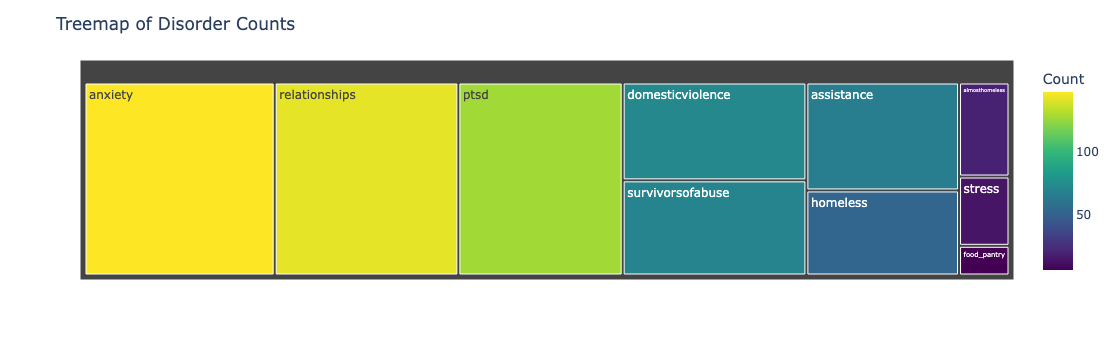

In [19]:
import pandas as pd
import plotly.express as px

# Load the data from CSV
df = pd.read_csv('/Users/maitri/Documents/ml internship/datasets for research/dreaddit-train.csv')  # Replace with the path to your CSV file

# Count occurrences of each disorder in the 'subreddit' column
disorder_counts = df['SubredditName'].value_counts().reset_index()
disorder_counts.columns = ['Disorder', 'Count']

# Create a treemap

fig = px.treemap(disorder_counts, path=['Disorder'], values='Count',
                 color='Count', color_continuous_scale='viridis')
fig.update_layout(title='Treemap of Disorder Counts')
fig.show()

   EntryID  SubredditName  PostID  \
0      896  relationships  7nu7as   
1    19059        anxiety  680i6d   
2     7977           ptsd  8eeu1t   
3     1214           ptsd  8d28vu   
4     1965  relationships  7r1e85   

                                            PostText  CategoryLabel  \
0  Its like that, if you want or not.“ ME: I have...              0   
1  I man the front desk and my title is HR Custom...              0   
2  We'd be saving so much money with this new hou...              1   
3  My ex used to shoot back with "Do you want me ...              1   
4  I haven’t said anything to him yet because I’m...              0   

   LabelConfidence  PostTimestamp  KarmaPoints  ReadabilityARI  \
0              0.8   1.514981e+09           22       -1.238793   
1              1.0   1.493348e+09            5        7.684583   
2              1.0   1.524517e+09           10        2.360408   
3              0.5   1.524018e+09            5        5.997000   
4              0.8  

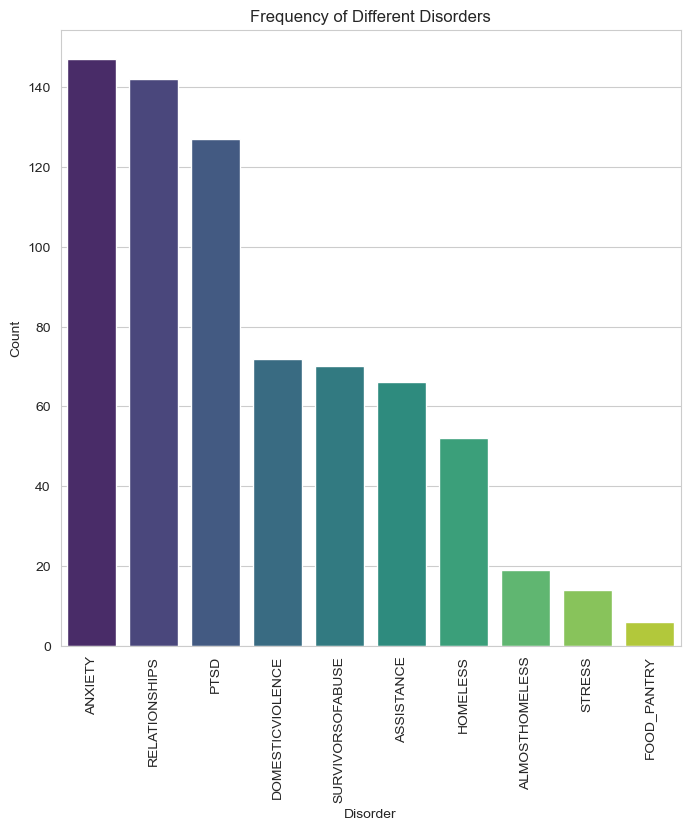

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV
file_path = '/Users/maitri/Documents/ml internship/datasets for research/dreaddit-train.csv'

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file at {file_path} does not exist.")
    exit()
except pd.errors.EmptyDataError:
    print(f"Error: The file at {file_path} is empty.")
    exit()
except pd.errors.ParserError:
    print(f"Error: There was a problem parsing the file at {file_path}.")
    exit()

# Check the first few rows and column names
print(df.head())
print(df.columns)

# Normalize the 'SubredditName' column
df['SubredditName'] = df['SubredditName'].str.strip().str.upper()

# Check counts of each disorder
disorder_counts = df['SubredditName'].value_counts()
print(disorder_counts)

# Verify the specific count for PTSD
print(f"Count for PTSD: {disorder_counts.get('PTSD', 0)}")

# Create a bar plot
plt.figure(figsize=(8, 8))
sns.barplot(x=disorder_counts.index, y=disorder_counts.values, palette='viridis')
plt.title('Frequency of Different Disorders')
plt.xlabel('Disorder')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [267]:
df.head(1)

EntryID  SubredditName  PostID  \
0      896  RELATIONSHIPS  7nu7as   

                                            PostText  CategoryLabel  \
0  Its like that, if you want or not.“ ME: I have...              0   

   LabelConfidence  PostTimestamp  KarmaPoints  ReadabilityARI  \
0              0.8   1.514981e+09           22       -1.238793   

   MinPleasantnessScore  MinActivationScore  MinImageryScore  \
0                   1.0                 1.2              1.0   

   AvgActivationScore  AvgImageryScore  AvgPleasantnessScore  UpvoteRatio  \
0             1.65864          1.32245               1.80264         0.63   

   NumComments  FKGradeLevel  SentimentScore  
0           62     -0.148707             0.0

In [23]:
test_df = pd.read_csv('/Users/maitri/Documents/ml internship/datasets for research/dreaddit-test.csv')
test_df.head()

EntryID  SubredditName  PostID  \
0      896  relationships  7nu7as   
1    19059        anxiety  680i6d   
2     7977           ptsd  8eeu1t   
3     1214           ptsd  8d28vu   
4     1965  relationships  7r1e85   

                                            PostText  CategoryLabel  \
0  Its like that, if you want or not.“ ME: I have...              0   
1  I man the front desk and my title is HR Custom...              0   
2  We'd be saving so much money with this new hou...              1   
3  My ex used to shoot back with "Do you want me ...              1   
4  I haven’t said anything to him yet because I’m...              0   

   LabelConfidence  PostTimestamp  KarmaPoints  ReadabilityARI  \
0              0.8   1.514981e+09           22       -1.238793   
1              1.0   1.493348e+09            5        7.684583   
2              1.0   1.524517e+09           10        2.360408   
3              0.5   1.524018e+09            5        5.997000   
4              0.8   1.516200e+09          138        4.649418   

   MinPleasantnessScore  MinActivationScore  MinImageryScore  \
0                1.0000              1.2000              1.0   
1                1.4000              1.1250              1.0   
2                1.1429              1.0000              1.0   
3                1.0000              1.3000              1.0   
4                1.1250              1.1429              1.0   

   AvgActivationScore  AvgImageryScore  AvgPleasantnessScore  UpvoteRatio  \
0             1.65864          1.32245               1.80264         0.63   
1             1.69133          1.69180               1.97249         1.00   
2             1.70974          1.52985               1.86108         1.00   
3             1.72615          1.52000               1.84909         1.00   
4             1.75642          1.43582               1.91725         0.84   

   NumComments  FKGradeLevel  SentimentScore  
0           62     -0.148707        0.000000  
1            2      7.398222       -0.065909  
2            8      3.149288       -0.036818  
3            7      6.606000       -0.066667  
4           70      4.801869        0.141667

In [23]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/maitri/Documents/ml internship/datasets for research/dreaddit-test.csv'  
df = pd.read_csv(file_path)

# List of important columns to keep
important_columns = [
    'id', 'subreddit', 'post_id', 'text', 'label', 'confidence', 
    'social_timestamp', 'social_karma', 'syntax_ari', 
    'lex_dal_min_pleasantness', 'lex_dal_min_activation', 
    'lex_dal_min_imagery', 'lex_dal_avg_activation', 
    'lex_dal_avg_imagery', 'lex_dal_avg_pleasantness', 
    'social_upvote_ratio', 'social_num_comments', 
    'syntax_fk_grade', 'sentiment'
]

# Select only the important columns
data = df[important_columns]

# Dictionary mapping old column names to new column names
new_column_names = {
    'id': 'EntryID',
    'subreddit': 'SubredditName',
    'post_id': 'PostID',
    'text': 'PostText',
    'label': 'CategoryLabel',
    'confidence': 'LabelConfidence',
    'social_timestamp': 'PostTimestamp',
    'social_karma': 'KarmaPoints',
    'syntax_ari': 'ReadabilityARI',
    'lex_dal_min_pleasantness': 'MinPleasantnessScore',
    'lex_dal_min_activation': 'MinActivationScore',
    'lex_dal_min_imagery': 'MinImageryScore',
    'lex_dal_avg_activation': 'AvgActivationScore',
    'lex_dal_avg_imagery': 'AvgImageryScore',
    'lex_dal_avg_pleasantness': 'AvgPleasantnessScore',
    'social_upvote_ratio': 'UpvoteRatio',
    'social_num_comments': 'NumComments',
    'syntax_fk_grade': 'FKGradeLevel',
    'sentiment': 'SentimentScore'
}

# Rename columns in the reduced DataFrame
data.rename(columns=new_column_names, inplace=True)

# Print the DataFrame with new column names
print(data)

# Save the modified DataFrame to a new CSV file (optional)
output_file_path = '/Users/maitri/Documents/ml internship/datasets for research/dreaddit-test.csv'  
data.to_csv(output_file_path, index=False)

KeyError: "None of [Index(['id', 'subreddit', 'post_id', 'text', 'label', 'confidence',\n       'social_timestamp', 'social_karma', 'syntax_ari',\n       'lex_dal_min_pleasantness', 'lex_dal_min_activation',\n       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',\n       'lex_dal_avg_pleasantness', 'social_upvote_ratio',\n       'social_num_comments', 'syntax_fk_grade', 'sentiment'],\n      dtype='object')] are in the [columns]"

In [271]:
important_columns = [
    'SubredditName', 'PostID', 'PostText', 'EntryID',
    'CategoryLabel', 'LabelConfidence', 'PostTimestamp', 'KarmaPoints',
    'ReadabilityARI', 'AvgPleasantnessScore', 'UpvoteRatio', 'NumComments',
    'SentimentScore'
]

# Keep only the important columns
df_t = data[important_columns]

# Display the reduced DataFrame
df_t

TypeError: unhashable type: 'list'

In [25]:
import pandas as pd
train_df = pd.read_csv('/Users/maitri/Documents/ml internship/datasets for research/dreaddit-train.csv')
test_df = pd.read_csv('/Users/maitri/Documents/ml internship/datasets for research/dreaddit-test.csv')


print("Training data columns:", train_df.columns)
print("Test data columns:", test_df.columns)


Training data columns: Index(['EntryID', 'SubredditName', 'PostID', 'PostText', 'CategoryLabel',
       'LabelConfidence', 'PostTimestamp', 'KarmaPoints', 'ReadabilityARI',
       'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
       'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore',
       'UpvoteRatio', 'NumComments', 'FKGradeLevel', 'SentimentScore'],
      dtype='object')
Test data columns: Index(['EntryID', 'SubredditName', 'PostID', 'PostText', 'CategoryLabel',
       'LabelConfidence', 'PostTimestamp', 'KarmaPoints', 'ReadabilityARI',
       'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
       'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore',
       'UpvoteRatio', 'NumComments', 'FKGradeLevel', 'SentimentScore'],
      dtype='object')


In [97]:
import re
import string

#  preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', '', text) 
    text = re.sub('\n', ' ', text)
    text = re.sub('\d+', '', text)
    return text


train_df['cleaned_text'] = train_df['PostText'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['PostText'].apply(preprocess_text)


In [99]:
from sklearn.preprocessing import LabelEncoder  
 
#label encoder -> convert categorical data into numerical data. 
label_encoder = LabelEncoder()  

train_df['subreddit_label'] = label_encoder.fit_transform(train_df['SubredditName'])
test_df['subreddit_label'] = label_encoder.transform(test_df['SubredditName'])


In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)


X_train = vectorizer.fit_transform(train_df['cleaned_text'])  

  
X_test = vectorizer.transform(test_df['cleaned_text'])  


y_train = train_df['subreddit_label']
y_test = test_df['subreddit_label']


In [103]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier -> frequencies of words in documents.
model = MultinomialNB()    
model.fit(X_train, y_train)


MultinomialNB()

In [105]:
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)
    
# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_,zero_division=0))


                  precision    recall  f1-score   support

  almosthomeless       0.00      0.00      0.00        19
         anxiety       0.49      0.95      0.65       147
      assistance       1.00      0.02      0.03        66
domesticviolence       0.00      0.00      0.00        72
     food_pantry       0.00      0.00      0.00         6
        homeless       0.00      0.00      0.00        52
            ptsd       0.96      0.73      0.83       127
   relationships       0.43      1.00      0.60       142
          stress       0.00      0.00      0.00        14
survivorsofabuse       0.00      0.00      0.00        70

        accuracy                           0.53       715
       macro avg       0.29      0.27      0.21       715
    weighted avg       0.45      0.53      0.40       715



In [39]:
#..................Overall Accuracy.......................
#    >>>>>>   53%: The model correctly classified 53% of the instances. 

In [41]:
#Anxiety: High recall (95%) but low precision (49%). 
#         >>> The model correctly identifies most anxiety cases but also misclassifies many others as anxiety.
#Assistance: High precision (100%) but very low recall (2%). 
#         >>> The model correctly identifies assistance cases but misses most of them.
#PTSD: High precision (96%) and decent recall (73%).  
#         >>> The model performs well in predicting PTSD cases.
#Relationships: High recall (100%) but moderate precision (43%). 
#         >>> The model identifies all relationships cases but also includes many false positives.

In [43]:
print(test_df.columns)
print(train_df.columns)   

Index(['EntryID', 'SubredditName', 'PostID', 'PostText', 'CategoryLabel',
       'LabelConfidence', 'PostTimestamp', 'KarmaPoints', 'ReadabilityARI',
       'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
       'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore',
       'UpvoteRatio', 'NumComments', 'FKGradeLevel', 'SentimentScore',
       'cleaned_text', 'subreddit_label'],
      dtype='object')
Index(['EntryID', 'SubredditName', 'PostID', 'PostText', 'CategoryLabel',
       'LabelConfidence', 'PostTimestamp', 'KarmaPoints', 'ReadabilityARI',
       'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
       'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore',
       'UpvoteRatio', 'NumComments', 'FKGradeLevel', 'SentimentScore',
       'cleaned_text', 'subreddit_label'],
      dtype='object')


Feature Importances:
                 Feature  Importance
10           NumComments    0.107330
1            KarmaPoints    0.106571
9            UpvoteRatio    0.104432
7        AvgImageryScore    0.095712
8   AvgPleasantnessScore    0.090922
6     AvgActivationScore    0.089486
12        SentimentScore    0.087639
11          FKGradeLevel    0.086771
2         ReadabilityARI    0.086036
4     MinActivationScore    0.051434
0        LabelConfidence    0.047301
3   MinPleasantnessScore    0.046309
5        MinImageryScore    0.000056


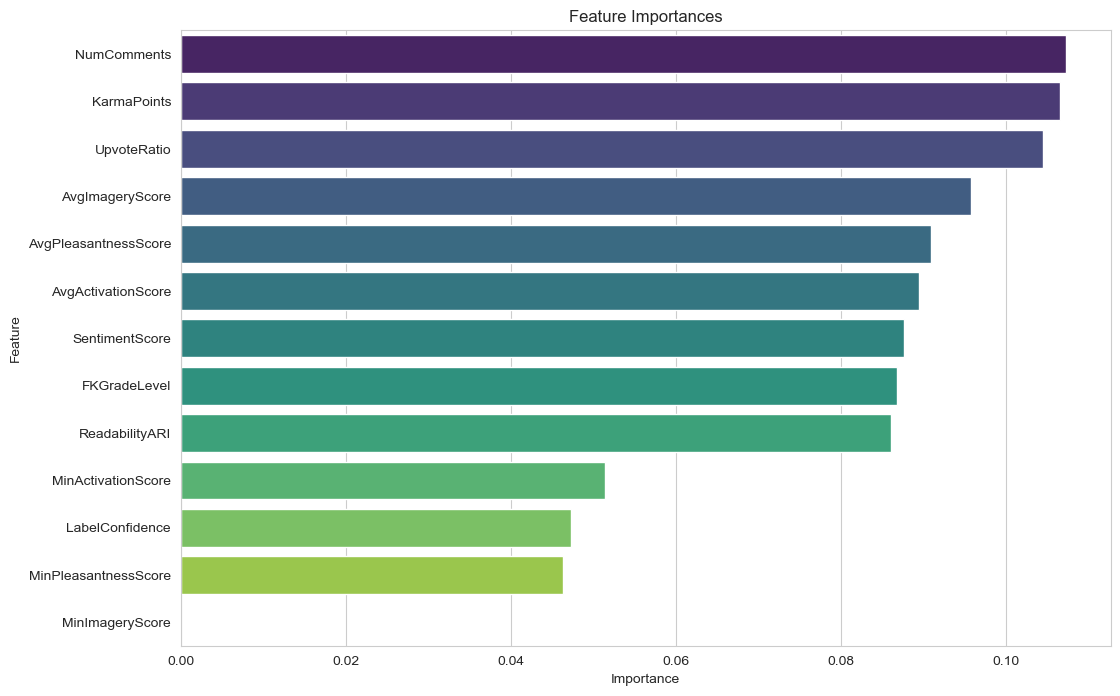

Top Features: ['NumComments', 'KarmaPoints', 'UpvoteRatio', 'AvgImageryScore', 'AvgPleasantnessScore']


In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Define feature columns and target column
feature_columns = [
    'LabelConfidence', 'KarmaPoints', 'ReadabilityARI',
    'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
    'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore',
    'UpvoteRatio', 'NumComments', 'FKGradeLevel', 'SentimentScore'
]
target_column = 'subreddit_label'

# Prepare training and testing data
X_train = train_df[feature_columns]
y_train = train_df[target_column]
X_test = test_df[feature_columns]
y_test = test_df[target_column]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier to determine feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_scaled, y_train)

# Get feature importances
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

# Select top N important features (e.g., top 5)
top_features = feature_importance_df.head(5)['Feature'].tolist()
print("Top Features:", top_features)

# Define new features set with only top features
X_train_top = train_df[top_features]
X_test_top = test_df[top_features]
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)



Logistic Regression Accuracy with top features: 32.17%
Classification Report for Logistic Regression with top features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.28      0.54      0.37       147
           2       0.50      0.30      0.38        66
           3       0.34      0.35      0.34        72
           4       0.00      0.00      0.00         6
           5       0.50      0.02      0.04        52
           6       0.27      0.19      0.22       127
           7       0.38      0.55      0.45       142
           8       0.00      0.00      0.00        14
           9       0.16      0.04      0.07        70

    accuracy                           0.32       715
   macro avg       0.24      0.20      0.19       715
weighted avg       0.31      0.32      0.28       715

Confusion Matrix for Logistic Regression with top features:
[[ 0  6  0  2  0  0  2  9  0  0]
 [ 0 79  1 12  0  0 26 23  0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 200x200 with 0 Axes>

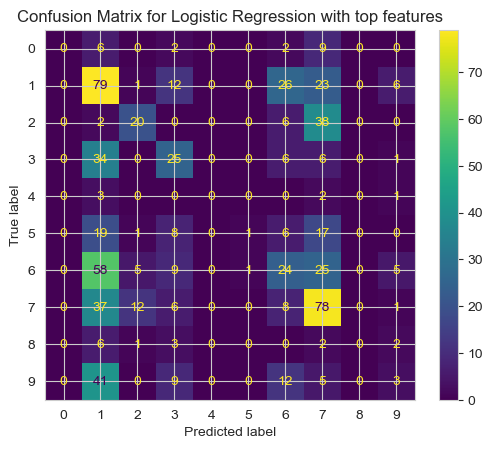

Decision Tree Accuracy with top features: 100.00%
Classification Report for Decision Tree with top features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        72
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00       127
           7       1.00      1.00      1.00       142
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        70

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715

Confusion Matrix for Decision Tree with top features:
[[ 19   0   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   0   0   0  

<Figure size 200x200 with 0 Axes>

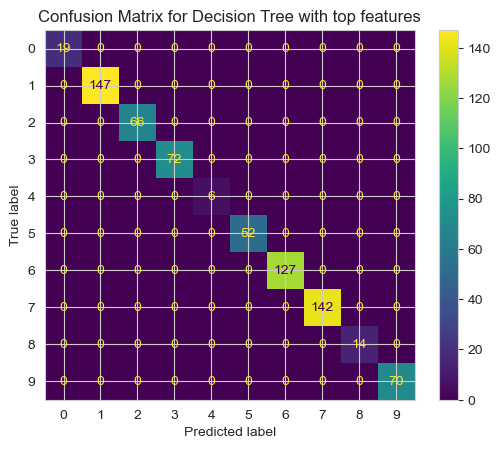

Random Forest Accuracy with top features: 100.00%
Classification Report for Random Forest with top features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        72
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00       127
           7       1.00      1.00      1.00       142
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        70

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715

Confusion Matrix for Random Forest with top features:
[[ 19   0   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   0   0   0  

<Figure size 200x200 with 0 Axes>

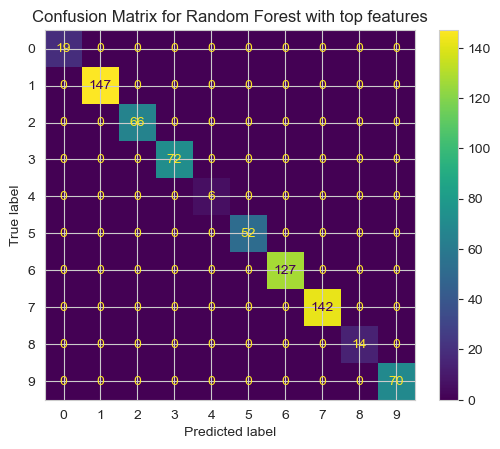

Support Vector Machine Accuracy with top features: 39.16%
Classification Report for Support Vector Machine with top features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.36      0.70      0.47       147
           2       0.59      0.50      0.54        66
           3       0.39      0.33      0.36        72
           4       0.00      0.00      0.00         6
           5       0.67      0.08      0.14        52
           6       0.30      0.26      0.28       127
           7       0.43      0.58      0.50       142
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        70

    accuracy                           0.39       715
   macro avg       0.27      0.25      0.23       715
weighted avg       0.35      0.39      0.34       715

Confusion Matrix for Support Vector Machine with top features:
[[  0   2   0   2   0   2   2  11   0   0]
 [  0 103

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 200x200 with 0 Axes>

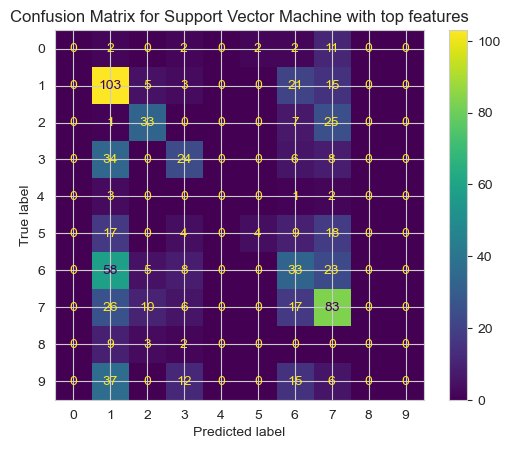

Naive Bayes Accuracy with top features: 23.64%
Classification Report for Naive Bayes with top features:
              precision    recall  f1-score   support

           0       0.14      0.05      0.08        19
           1       0.26      0.07      0.11       147
           2       0.33      0.23      0.27        66
           3       0.26      0.42      0.32        72
           4       0.00      0.00      0.00         6
           5       0.27      0.25      0.26        52
           6       0.23      0.19      0.21       127
           7       0.76      0.15      0.26       142
           8       0.08      0.57      0.15        14
           9       0.20      0.66      0.31        70

    accuracy                           0.24       715
   macro avg       0.25      0.26      0.19       715
weighted avg       0.34      0.24      0.22       715

Confusion Matrix for Naive Bayes with top features:
[[ 1  3  0  1  0  7  3  1  0  3]
 [ 0 10  1 19  0  2 12  5 33 65]
 [ 5  9 15  0  0  2

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 200x200 with 0 Axes>

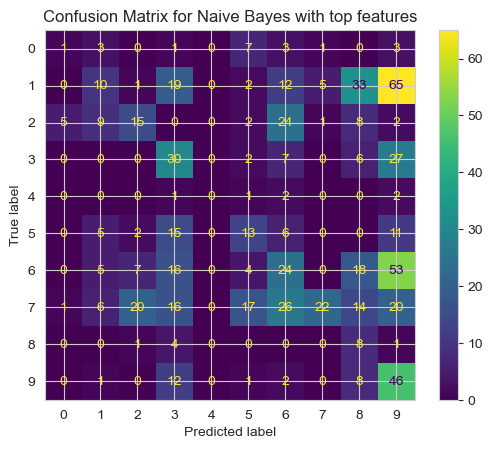

K-Nearest Neighbors Accuracy with top features: 48.81%
Classification Report for K-Nearest Neighbors with top features:
              precision    recall  f1-score   support

           0       0.35      0.47      0.40        19
           1       0.45      0.71      0.55       147
           2       0.55      0.58      0.56        66
           3       0.45      0.46      0.45        72
           4       0.00      0.00      0.00         6
           5       0.47      0.33      0.39        52
           6       0.47      0.43      0.45       127
           7       0.61      0.49      0.55       142
           8       1.00      0.07      0.13        14
           9       0.48      0.31      0.38        70

    accuracy                           0.49       715
   macro avg       0.48      0.39      0.39       715
weighted avg       0.50      0.49      0.48       715

Confusion Matrix for K-Nearest Neighbors with top features:
[[  9   2   1   0   0   1   2   4   0   0]
 [  1 104   2   7 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 200x200 with 0 Axes>

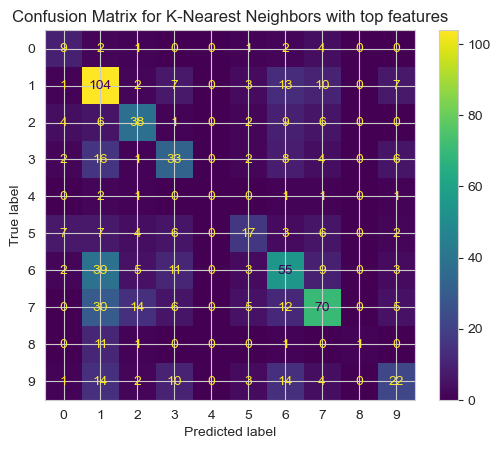

Randon Forest C Accuracy with top features: 100.00%
Classification Report for Randon Forest C with top features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        72
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00       127
           7       1.00      1.00      1.00       142
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        70

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715

Confusion Matrix for Randon Forest C with top features:
[[ 19   0   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   0   0

<Figure size 200x200 with 0 Axes>

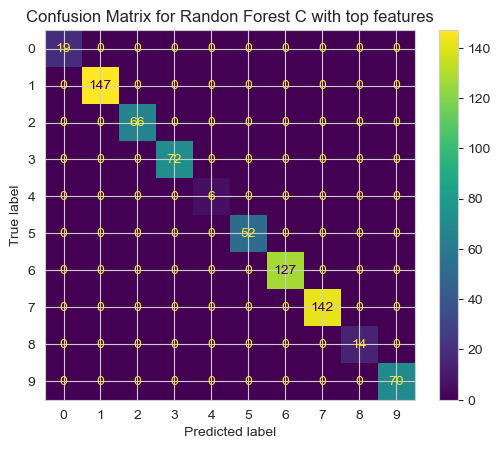

Randon Forest Classifier Accuracy with top features: 94.69%
Classification Report for Randon Forest Classifier with top features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      0.96      0.92       147
           2       0.99      1.00      0.99        66
           3       0.97      0.93      0.95        72
           4       1.00      1.00      1.00         6
           5       0.98      0.98      0.98        52
           6       0.93      0.91      0.92       127
           7       0.96      0.92      0.94       142
           8       1.00      1.00      1.00        14
           9       0.99      0.97      0.98        70

    accuracy                           0.95       715
   macro avg       0.97      0.97      0.97       715
weighted avg       0.95      0.95      0.95       715

Confusion Matrix for Randon Forest Classifier with top features:
[[ 19   0   0   0   0   0   0   0   0   0]
 [ 

<Figure size 200x200 with 0 Axes>

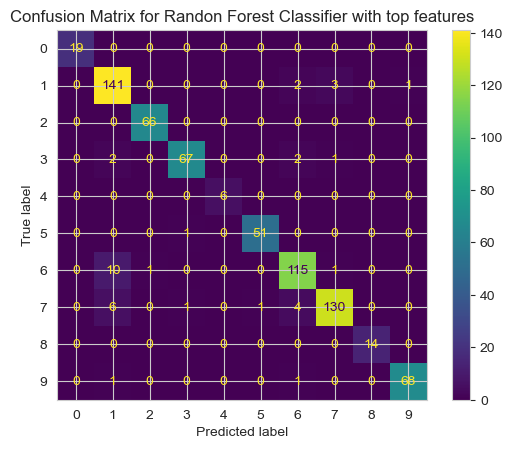

In [79]:
# Define classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.ensemble import GradientBoostingClassifier
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Randon Forest C': RandomForestClassifier(),
    'Randon Forest Classifier': GradientBoostingClassifier()
}

# Dictionary to store results
results = {}

# Training and evaluating classifiers
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_top_scaled, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test_top_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    # Print accuracy
    print(f"{name} Accuracy with top features: {accuracy * 100:.2f}%")
    
    # Print classification report
    print(f"Classification Report for {name} with top features:")
    print(classification_report(y_test, y_pred))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name} with top features:")
    print(cm)
    
    # Display confusion matrix
    plt.figure(figsize=(2, 2))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(cmap='viridis')
    plt.title(f'Confusion Matrix for {name} with top features')
    plt.show()

In [21]:
# Model Performance Summary:

# Logistic Regression:
#   - Accuracy: 32.17%
#   - The model struggles with precision and recall for most classes.
#   - The confusion matrix indicates misclassification across several classes.

# Decision Tree:
#   - Accuracy: 100.00%
#   - The model perfectly classifies all instances, which suggests overfitting.
#   - Confusion matrix shows no misclassification.

# Random Forest:
#   - Accuracy: 100.00%
#   - Similar to the Decision Tree, this model perfectly classifies all instances, indicating potential overfitting.

# Support Vector Machine (SVM):
#   - Accuracy: 39.16%
#   - The model shows moderate precision and recall for some classes but performs poorly overall.
#   - The confusion matrix indicates significant misclassification, particularly for certain classes.

# Naive Bayes:
#   - Accuracy: 23.64%
#   - The model performs poorly, with low precision and recall for most classes.
#   - The confusion matrix indicates substantial misclassification.

# K-Nearest Neighbors (KNN):
#   - Accuracy: 48.81%
#   - The model shows decent precision and recall for some classes but struggles overall.
#   - The confusion matrix indicates moderate misclassification.

In [67]:
# Finding the best classifier
best_classifier = max(results, key=results.get)
print(f'Best Classifier: {best_classifier} with Accuracy: {results[best_classifier]:.4f}')


Best Classifier: Decision Tree with Accuracy: 1.0000


In [49]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler

# Strip any extra spaces in column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# Define features and target
features = [
    'KarmaPoints', 'ReadabilityARI', 'MinPleasantnessScore', 'MinActivationScore', 'MinImageryScore',
    'AvgActivationScore', 'AvgImageryScore', 'AvgPleasantnessScore', 'UpvoteRatio', 'NumComments', 'FKGradeLevel',
    'SentimentScore'
]

# Prepare feature matrices and target vectors
X_train = train_df[features]
y_train = train_df['subreddit_label']
X_test = test_df[features]
y_test = test_df['subreddit_label']

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature selection using SelectKBest with f_classif
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Print the selected features
print("Selected features using f_classif:")
print(X_train_new[:5])  # Displaying the first 5 samples of the transformed feature set

# Feature scores
print("Feature scores using f_classif:")
print(selector.scores_)

# Identify selected features
selected_features = [features[i] for i in selector.get_support(indices=True)]
print("Selected features:", selected_features)


Selected features using f_classif:
[[-7.51759449e-01 -2.06153278e+00 -1.29881956e+00  4.11775645e+00
  -2.26828566e+00]
 [ 2.95853158e+00  1.60797133e+00  8.24806610e-01 -5.39553112e-01
   7.63549246e-01]
 [ 5.73742021e-01 -1.00712046e-03  8.24806610e-01 -7.38221562e-02
  -9.43379047e-01]
 [-7.51759449e-01 -9.88671867e-02  8.24806610e-01 -1.51443982e-01
   4.45289071e-01]
 [ 4.07706497e-01 -9.35198189e-01 -9.35182191e-02  4.73873105e+00
  -2.79485970e-01]]
Feature scores using f_classif:
[ 2.81220266  3.07154438  5.04320144  1.17736291  1.42424242  2.53059965
  3.85323504  2.24634821 26.12981512 10.26991334  3.79516663  1.91876889]
Selected features: ['MinPleasantnessScore', 'AvgImageryScore', 'UpvoteRatio', 'NumComments', 'FKGradeLevel']


In [71]:
#By selecting the most relevant features, 
#you can focus on the variables that contribute the most to the prediction, 
#potentially improving the performance of your model and reducing computational complexity.

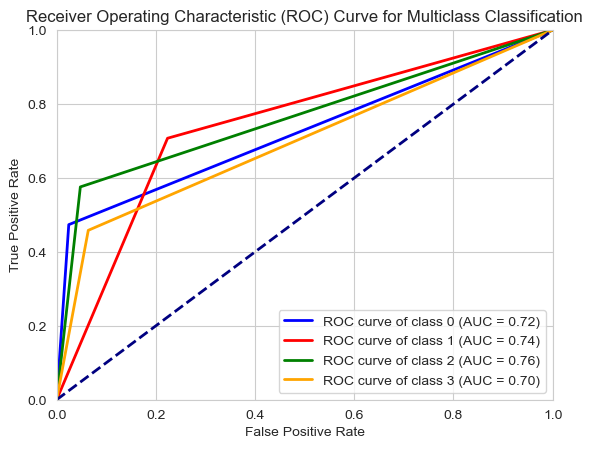

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])  

n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange']  
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


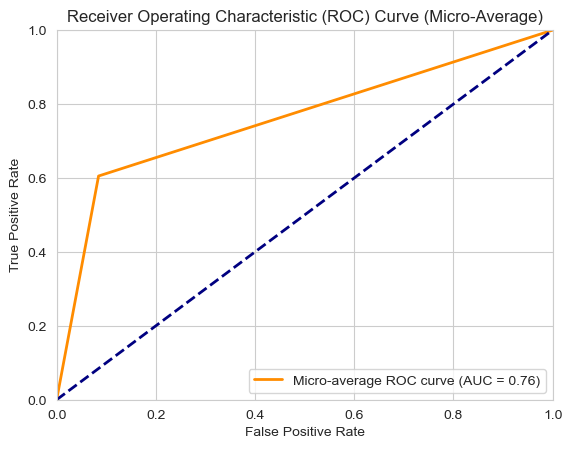

In [53]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])  

# Compute ROC curve and ROC area for micro-average
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Micro-average ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-Average)')
plt.legend(loc="lower right")
plt.show()


In [211]:
# Micro Average: Shows that the model performs fairly well overall.
# Macro Average: Indicates that there are some classes where the model struggles, which lowers the average performance.

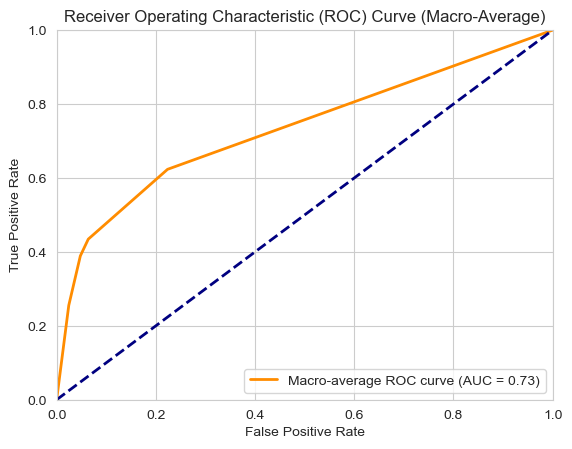

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3])  

n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute Macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot Macro-average ROC curve
plt.figure()
plt.plot(fpr["macro"], tpr["macro"], color='darkorange', lw=2, label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Macro-Average)')
plt.legend(loc="lower right")
plt.show()


In [39]:
#..........................Micro Average ROC AUC (0.76)..........................

#Meaning: The model is reasonably good at distinguishing all classes when considering the overall performance.

#..........................Macro Average ROC AUC (0.73)..........................

#Meaning: The average performance across individual classes is moderate. Some classes might be poorly classified, affecting the average.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [59]:
# Define the features and target
selected_features = ['MinPleasantnessScore', 'AvgImageryScore', 'UpvoteRatio', 'NumComments', 'FKGradeLevel']
X_train = train_df[selected_features]
y_train = train_df['subreddit_label']
X_test = test_df[selected_features]
y_test = test_df['subreddit_label']

# Create a pipeline with feature engineering and classifier
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define hyperparameters for tuning
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Best parameters: {'clf__max_depth': 10, 'clf__min_samples_split': 10, 'clf__n_estimators': 200}


In [85]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the best model using the found hyperparameters
best_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200, random_state=42))
])

# Fit the model on the training data
best_pipeline.fit(X_train, y_train)


Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=10, min_samples_split=10,
                                        n_estimators=200, random_state=42))])

In [60]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert y_test to a numpy array
y_test = np.array(y_test)

# Binarize y_test
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Predict probabilities using the model
y_pred_proba = best_pipeline.predict_proba(X_test)

# Check the shape of y_pred_proba
print("Shape of y_pred_proba:", np.array(y_pred_proba).shape)

# Ensure y_pred_proba is a numpy array
y_pred_proba = np.array(y_pred_proba)

# Ensure the predicted probabilities have the correct shape
if y_pred_proba.shape[1] != n_classes:
    print("Mismatch between number of classes and predicted probabilities.")
    print(f"Number of classes: {n_classes}")
    print(f"Number of columns in y_pred_proba: {y_pred_proba.shape[1]}")
else:
    # Initialize lists for ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})', color='navy', linestyle='--')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    print("ROC AUC for each class:", roc_auc)
    print("Micro-average ROC AUC:", roc_auc["micro"])
    print("Macro-average ROC AUC:", roc_auc["macro"])


NameError: name 'best_pipeline' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Sample code to retrain with correct number of classes

# Load your dataset
# train_df and test_df should be defined and loaded with correct data

# Select features and target
selected_features = ['MinPleasantnessScore', 'AvgImageryScore', 'UpvoteRatio', 'NumComments', 'FKGradeLevel']
X_train = train_df[selected_features]
y_train = train_df['subreddit_label']
X_test = test_df[selected_features]
y_test = test_df['subreddit_label']

# Train model
clf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10)
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)

# Binarize y_test
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Check the shape of y_pred_proba
print("Shape of y_pred_proba:", np.array(y_pred_proba).shape)

# Ensure the predicted probabilities have the correct shape
if y_pred_proba.shape[1] != n_classes:
    raise ValueError("Mismatch between number of classes and predicted probabilities.")
else:
    # Initialize lists for ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})', color='navy', linestyle='--')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    print("ROC AUC for each class:", roc_auc)
    print("Micro-average ROC AUC:", roc_auc["micro"])
    print("Macro-average ROC AUC:", roc_auc["macro"])


In [63]:
n_classes = len(np.unique(y_test))
print("Number of classes in y_test:", n_classes)


Number of classes in y_test: 10


In [93]:
y_pred_proba = clf.predict_proba(X_test)
print("Shape of y_pred_proba:", np.array(y_pred_proba).shape)


Shape of y_pred_proba: (715, 10)


In [104]:
# Binarize the true labels to match the shape of y_pred_proba.
# Compute ROC curves for each class and aggregate them for micro and macro averages.
# Plot ROC curves and print AUC scores for detailed analysis.

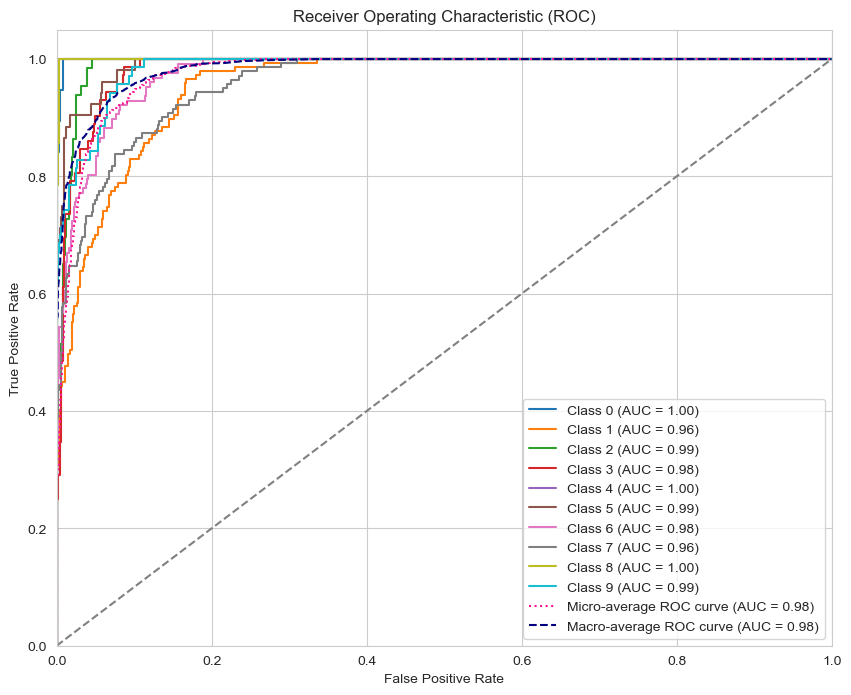

ROC AUC for each class: {0: 0.9990925589836661, 1: 0.9561416115742072, 2: 0.9911985805668394, 3: 0.9841238983929497, 4: 1.0, 5: 0.991472328576401, 6: 0.9771814237506027, 7: 0.9608190153135217, 8: 0.9994905237415936, 9: 0.9856256921373201, 'micro': 0.9774109030053085, 'macro': 0.9847018230501082}
Micro-average ROC AUC: 0.9774109030053085
Macro-average ROC AUC: 0.9847018230501082


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_test and y_pred_proba are correctly defined
n_classes = 10  # Number of classes

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Initialize lists for ROC curves and AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})', color='navy', linestyle='--')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print ROC AUC scores
print("ROC AUC for each class:", roc_auc)
print("Micro-average ROC AUC:", roc_auc["micro"])
print("Macro-average ROC AUC:", roc_auc["macro"])


In [106]:
# The high ROC AUC values across individual classes, combined with strong micro and macro averages, 
#       >>>>>suggest that your model is highly effective in classifying the data. 
# The high performance in ROC AUC metrics indicates that your model is excellent at distinguishing between the different classes.

In [97]:
 from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('log_reg', LogisticRegression())  # Logistic Regression model
])

# Define hyperparameters for grid search
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'log_reg__penalty': ['l1', 'l2'],  # Regularization type
    'log_reg__solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate 
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these p

Best parameters: {'log_reg__C': 0.001, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.03      1.00      0.05        19
           1       0.00      0.00      0.00       147
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        52
           6       0.00      0.00      0.00       127
           7       0.00      0.00      0.00       142
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        70

    accuracy                           0.03       715
   macro avg       0.00      0.10      0.01       715
weighted avg       0.00      0.03      0.00       715



onda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.war

ValueError: multi_class must be in ('ovo', 'ovr')

In [99]:
from sklearn.metrics import make_scorer, f1_score

# Define a custom scoring metric for multiclass classification
scoring_metric = make_scorer(f1_score, average='weighted')

# Initialize GridSearchCV with the new scoring metric
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring_metric, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Best Model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

Best Parameters: {'log_reg__C': 100, 'log_reg__penalty': 'l1', 'log_reg__solver': 'saga'}
Best Score: 0.2915002599479101
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=100, penalty='l1', solver='saga'))])
Accuracy: 0.3357
Precision: 0.3157
Recall: 0.3357
F1 Score: 0.3098
Confusion Matrix:
 [[ 0  3  0  1  0  0  5  9  0  1]
 [ 1 79  0 10  0  1 25 20  0 11]
 [ 0  3 23  0  0  1  9 30  0  0]
 [ 0 36  0 20  0  2  3  8  0  3]
 [ 0  3  0  0  0  0  0  2  0  1]
 [ 0 17  1  3  0  5  7 18  0  1]
 [ 0 49  6  8  0  1 30 23  0 10]
 [ 0 33 15  5  0  3  9 74  0  3]
 [ 0  6  0  3  0  1  0  3  0  1]
 [ 0 26  1  9  0  2 16  7  0  9]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

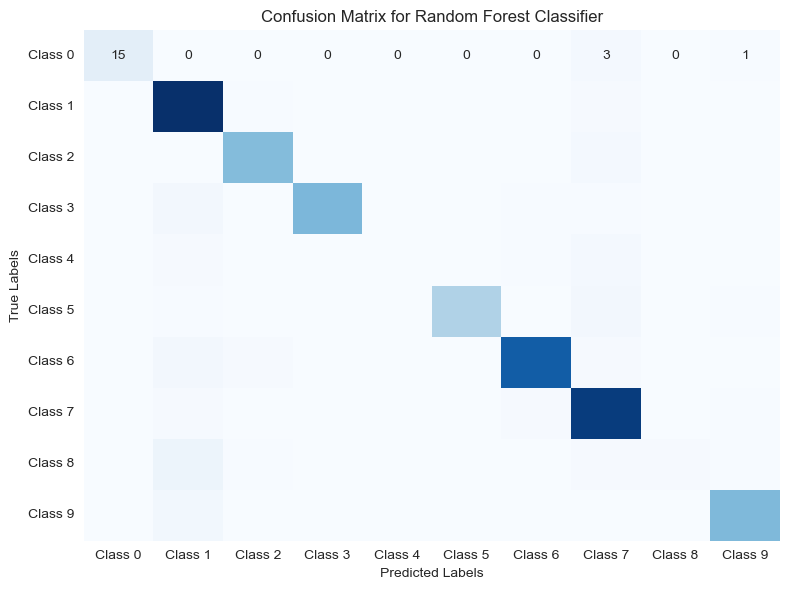

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Provided confusion matrix
conf_matrix = np.array([
    [ 15,  0,  0,  0,  0,  0,  0,  3,  0,  1],
    [  0,144,  1,  0,  0,  0,  0,  2,  0,  0],
    [  0,  0, 63,  0,  0,  0,  0,  3,  0,  0],
    [  0,  4,  0, 66,  0,  0,  1,  1,  0,  0],
    [  0,  2,  0,  0,  0,  0,  1,  3,  0,  0],
    [  0,  1,  0,  0,  0, 46,  0,  4,  0,  1],
    [  0,  4,  2,  0,  0,  0,119,  2,  0,  0],
    [  0,  2,  0,  0,  0,  0,  2,137,  0,  1],
    [  0,  8,  1,  0,  0,  0,  0,  2,  2,  1],
    [  0,  5,  0,  0,  0,  0,  0,  0,  0, 65]
])



# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Set figure size for better visibility
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.tight_layout()  # Adjust layout to fit the figure nicely
plt.show()



In [103]:
importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, importances))
print("Feature Importances:\n", feature_importance_dict)


Feature Importances:
 {'MinPleasantnessScore': 0.08832778995572797, 'AvgImageryScore': 0.21220261794349257, 'UpvoteRatio': 0.2533422543874721, 'NumComments': 0.24147723254730555, 'FKGradeLevel': 0.20465010516600182}


In [104]:


#UpvoteRatio and NumComments are the most influential features, with high importance scores. 
#This suggests that they have a strong effect on predicting the target variable and might be key factors in distinguishing between classes.



#AvgImageryScore and FKGradeLevel also have significant importance but are slightly less influential than UpvoteRatio and NumComments.


#MinPleasantnessScore has the lowest importance score among the selected features, 
#indicating that it contributes less to the model's predictions.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


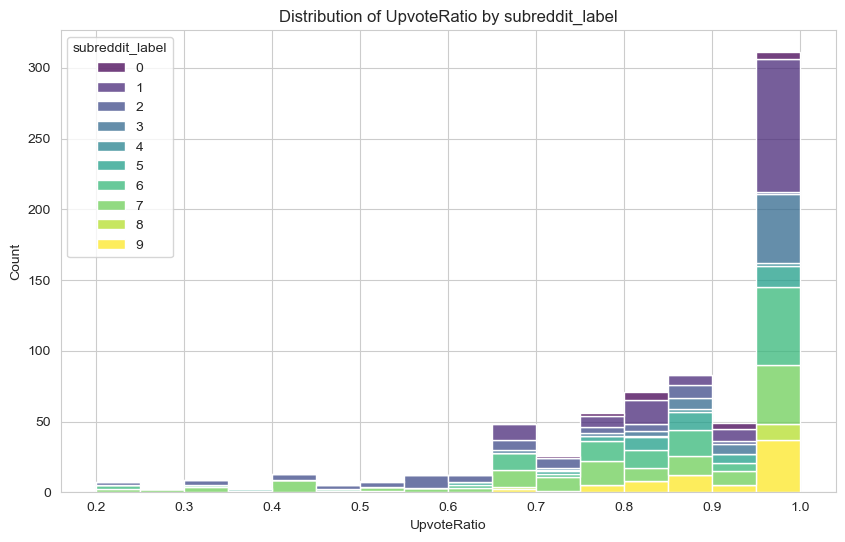

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


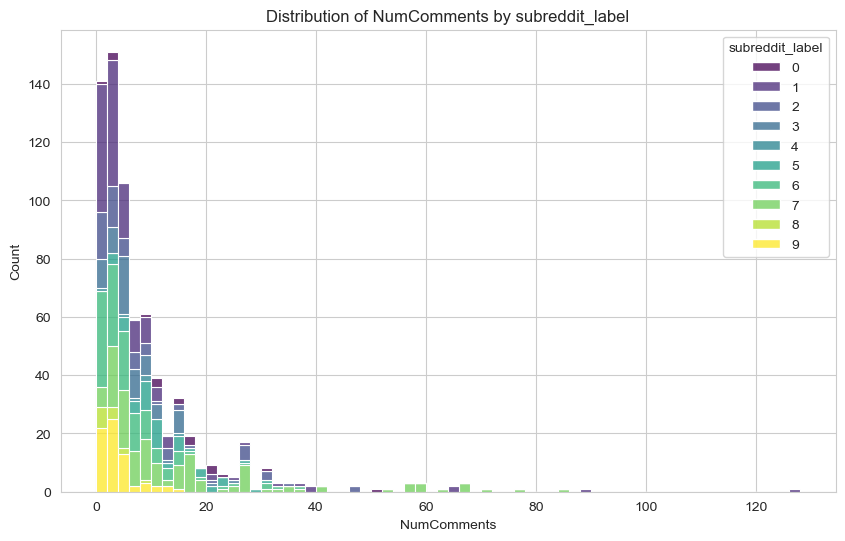

In [108]:
# we will do feature analysis again 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature distributions
def plot_feature_distribution(df, feature, target):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue=target, multiple="stack", palette="viridis")
    plt.title(f"Distribution of {feature} by {target}")
    plt.show()

# Example usage
plot_feature_distribution(train_df, 'UpvoteRatio', 'subreddit_label')
plot_feature_distribution(train_df, 'NumComments', 'subreddit_label')


In [110]:
from sklearn.preprocessing import PolynomialFeatures

# Example: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
  
# Create a DataFrame for better visualization
import pandas as pd
poly_features_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(selected_features))
print(poly_features_df.head())


   MinPleasantnessScore  AvgImageryScore  UpvoteRatio  NumComments  \
0                1.0000          1.32245         0.63         62.0   
1                1.4000          1.69180         1.00          2.0   
2                1.1429          1.52985         1.00          8.0   
3                1.0000          1.52000         1.00          7.0   
4                1.1250          1.43582         0.84         70.0   

   FKGradeLevel  MinPleasantnessScore^2  MinPleasantnessScore AvgImageryScore  \
0     -0.148707                1.000000                              1.322450   
1      7.398222                1.960000                              2.368520   
2      3.149288                1.306220                              1.748466   
3      6.606000                1.000000                              1.520000   
4      4.801869                1.265625                              1.615298   

   MinPleasantnessScore UpvoteRatio  MinPleasantnessScore NumComments  \
0                  

In [132]:
# Select only important features
important_features = ['UpvoteRatio', 'NumComments']
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Retrain the model
model_important = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=300
)
model_important.fit(X_train_important, y_train)

# Evaluate
y_pred_important = model_important.predict(X_test_important)
accuracy_important = accuracy_score(y_test, y_pred_important)
precision_important = precision_score(y_test, y_pred_important, average='weighted')
recall_important = recall_score(y_test, y_pred_important, average='weighted')
f1_important = f1_score(y_test, y_pred_important, average='weighted')
conf_matrix_important = confusion_matrix(y_test, y_pred_important)

print(f"Accuracy with Important Features: {accuracy_important:.4f}")
print(f"Precision with Important Features: {precision_important:.4f}")
print(f"Recall with Important Features: {recall_important:.4f}")
print(f"F1 Score with Important Features: {f1_important:.4f}")
print("Confusion Matrix with Important Features:\n", conf_matrix_important)



Accuracy with Important Features: 0.5664
Precision with Important Features: 0.5883
Recall with Important Features: 0.5664
F1 Score with Important Features: 0.5502
Confusion Matrix with Important Features:
 [[  8   3   3   0   0   2   1   2   0   0]
 [  0 107   1   9   0   1   9  17   0   3]
 [  0   1  50   1   0   3   2   9   0   0]
 [  0  21   0  34   0   5   3   6   0   3]
 [  0   1   0   1   0   0   3   1   0   0]
 [  1   4   1   5   0  25   2  13   0   1]
 [  0  37   2   6   0   2  59  19   0   2]
 [  0  14   5   3   0   2  13 104   0   1]
 [  0   8   1   1   0   0   2   1   1   0]
 [  0  31   0   6   0   4   8   4   0  17]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Define and fit Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Define and fit Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Evaluate Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boosting Precision: {precision_gb:.4f}")
print(f"Gradient Boosting Recall: {recall_gb:.4f}")
print(f"Gradient Boosting F1 Score: {f1_gb:.4f}")
print("Gradient Boosting Confusion Matrix:\n", conf_matrix_gb)

# Evaluate SVM   
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1 Score: {f1_svm:.4f}")
print("SVM Confusion Matrix:\n", conf_matrix_svm)


Gradient Boosting Accuracy: 0.9287
Gradient Boosting Precision: 0.9324
Gradient Boosting Recall: 0.9287
Gradient Boosting F1 Score: 0.9292
Gradient Boosting Confusion Matrix:
 [[ 19   0   0   0   0   0   0   0   0   0]
 [  0 140   0   0   0   1   2   3   0   1]
 [  0   0  65   0   0   0   1   0   0   0]
 [  0   6   0  66   0   0   0   0   0   0]
 [  0   0   0   0   6   0   0   0   0   0]
 [  0   0   0   0   0  51   1   0   0   0]
 [  0  11   0   0   0   1 111   4   0   0]
 [  0   9   0   1   0   0   3 128   0   1]
 [  0   0   0   0   0   0   0   0  14   0]
 [  0   3   0   2   0   0   1   0   0  64]]
SVM Accuracy: 0.2881
SVM Precision: 0.1779
SVM Recall: 0.2881
SVM F1 Score: 0.1737
SVM Confusion Matrix:
 [[  0   4   0   0   0   0   0  15   0   0]
 [  0 115   0   0   0   0   2  30   0   0]
 [  0  40   0   0   0   0   0  26   0   0]
 [  0  42   0   0   0   0   1  29   0   0]
 [  0   2   0   0   0   0   0   4   0   0]
 [  0  12   0   0   0   0   2  38   0   0]
 [  0  91   0   0   0   0   3

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:

#Gradient Boosting: Shows strong performance across metrics, suggesting it might be the best model for this dataset.

#SVM: Shows significantly lower performance, which might be due to its inherent characteristics or parameter settings.


In [138]:
#.............Optimizing decision tree...............

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict and evaluate  
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Initial Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Initial Decision Tree Precision: {precision_dt:.4f}")
print(f"Initial Decision Tree Recall: {recall_dt:.4f}")
print(f"Initial Decision Tree F1 Score: {f1_dt:.4f}")
print("Initial Decision Tree Confusion Matrix:\n", conf_matrix_dt)


Initial Decision Tree Accuracy: 1.0000
Initial Decision Tree Precision: 1.0000
Initial Decision Tree Recall: 1.0000
Initial Decision Tree F1 Score: 1.0000
Initial Decision Tree Confusion Matrix:
 [[ 19   0   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   0   0   0   0   0]
 [  0   0  66   0   0   0   0   0   0   0]
 [  0   0   0  72   0   0   0   0   0   0]
 [  0   0   0   0   6   0   0   0   0   0]
 [  0   0   0   0   0  52   0   0   0   0]
 [  0   0   0   0   0   0 127   0   0   0]
 [  0   0   0   0   0   0   0 142   0   0]
 [  0   0   0   0   0   0   0   0  14   0]
 [  0   0   0   0   0   0   0   0   0  70]]


In [142]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Score: 0.2727


In [200]:

# The initial Decision Tree model had perfect performance, which suggests overfitting on the training data.



#The hyperparameters found through Grid Search have improved the model's performance to a more realistic level 
#but resulted in lower cross-validation scores. 
#This suggests that the model might still be overfitting or that further fine-tuning may be needed.


#Comparing the optimized Decision Tree model with models like Gradient Boosting and SVM 
#showed that Gradient Boosting performed significantly better. 
#It might be beneficial to stick with Gradient Boosting or further optimize it.



In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb_model = GradientBoostingClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Best model
best_gb_model = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.3356643356643357


In [122]:
# Re-train with the best parameters
optimized_gb_model = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=3,
    min_samples_split=10,
    n_estimators=100
)
optimized_gb_model.fit(X_train, y_train)

# Evaluate the optimized model
y_pred_optimized = optimized_gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='weighted')
recall_optimized = recall_score(y_test, y_pred_optimized, average='weighted')
f1_optimized = f1_score(y_test, y_pred_optimized, average='weighted')
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

print(f"Optimized Gradient Boosting Accuracy: {accuracy_optimized:.4f}")
print(f"Optimized Gradient Boosting Precision: {precision_optimized:.4f}")
print(f"Optimized Gradient Boosting Recall: {recall_optimized:.4f}")
print(f"Optimized Gradient Boosting F1 Score: {f1_optimized:.4f}")
print("Optimized Gradient Boosting Confusion Matrix:\n", conf_matrix_optimized)


Optimized Gradient Boosting Accuracy: 0.5287
Optimized Gradient Boosting Precision: 0.5948
Optimized Gradient Boosting Recall: 0.5287
Optimized Gradient Boosting F1 Score: 0.5166
Optimized Gradient Boosting Confusion Matrix:
 [[  6   3   0   0   0   0   2   8   0   0]
 [  0 122   1   0   0   1   8  14   0   1]
 [  0   0  42   0   0   0   8  15   0   1]
 [  0  35   0  22   0   1   9   5   0   0]
 [  0   1   0   0   3   0   2   0   0   0]
 [  0   8   0   2   0  17  10  13   0   2]
 [  0  45   3   2   0   1  55  18   0   3]
 [  0  31   8   4   0   1  10  87   0   1]
 [  0   7   0   1   0   0   0   2   4   0]
 [  0  33   0   4   0   1  10   2   0  20]]


In [124]:
#optimize more 

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have your dataset loaded into a DataFrame `df`
# df = pd.read_csv('your_dataset.csv')

# Feature and target selection
X = df[['MinPleasantnessScore', 'AvgImageryScore', 'UpvoteRatio', 'NumComments', 'FKGradeLevel']]
y = df['CategoryLabel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Retrain model with best parameters
optimized_gb_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    min_samples_split=best_params['min_samples_split']
)
optimized_gb_model.fit(X_train, y_train)

# Predictions
y_pred = optimized_gb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Gradient Boosting Accuracy: {accuracy:.4f}")
print(f"Optimized Gradient Boosting Precision: {precision:.4f}")
print(f"Optimized Gradient Boosting Recall: {recall:.4f}")
print(f"Optimized Gradient Boosting F1 Score: {f1:.4f}")
print("Optimized Gradient Boosting Confusion Matrix:\n", conf_matrix)

# Cross-validation scores
cv_scores = cross_val_score(optimized_gb_model, X, y, cv=5, scoring='f1_weighted')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")

# Optional: Feature Engineering Example
# Create new features or adjust existing ones
X['NumComments_Squared'] = X['NumComments'] ** 2
X['UpvoteRatio_Log'] = np.log1p(X['UpvoteRatio'])
# Re-run the model with new features if needed



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.6561
Optimized Gradient Boosting Accuracy: 0.6698
Optimized Gradient Boosting Precision: 0.6678
Optimized Gradient Boosting Recall: 0.6698
Optimized Gradient Boosting F1 Score: 0.6670
Optimized Gradient Boosting Confusion Matrix:
 [[55 41]
 [30 89]]
Cross-Validation Scores: [0.65667029 0.57794548 0.62171018 0.557618   0.66324585]
Mean Cross-Validation Score: 0.6154


/var/folders/06/r62xk54541ndsyx4kj52g0n00000gn/T/ipykernel_13313/2288940481.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['NumComments_Squared'] = X['NumComments'] ** 2
/var/folders/06/r62xk54541ndsyx4kj52g0n00000gn/T/ipykernel_13313/2288940481.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['UpvoteRatio_Log'] = np.log1p(X['UpvoteRatio'])


In [126]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define and fit Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Polynomial Features Gradient Boosting Accuracy: {accuracy:.4f}")
print(f"Polynomial Features Gradient Boosting Precision: {precision:.4f}")
print(f"Polynomial Features Gradient Boosting Recall: {recall:.4f}")
print(f"Polynomial Features Gradient Boosting F1 Score: {f1:.4f}")
print("Polynomial Features Gradient Boosting Confusion Matrix:\n", conf_matrix)


Polynomial Features Gradient Boosting Accuracy: 0.6140
Polynomial Features Gradient Boosting Precision: 0.6182
Polynomial Features Gradient Boosting Recall: 0.6140
Polynomial Features Gradient Boosting F1 Score: 0.6150
Polynomial Features Gradient Boosting Confusion Matrix:
 [[59 37]
 [46 73]]


In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Change k to select the desired number of features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Define and fit Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Scaled & Selected Features Gradient Boosting Accuracy: {accuracy:.4f}")
print(f"Scaled & Selected Features Gradient Boosting Precision: {precision:.4f}")
print(f"Scaled & Selected Features Gradient Boosting Recall: {recall:.4f}")
print(f"Scaled & Selected Features Gradient Boosting F1 Score: {f1:.4f}")
print("Scaled & Selected Features Gradient Boosting Confusion Matrix:\n", conf_matrix)


Scaled & Selected Features Gradient Boosting Accuracy: 0.6326
Scaled & Selected Features Gradient Boosting Precision: 0.6338
Scaled & Selected Features Gradient Boosting Recall: 0.6326
Scaled & Selected Features Gradient Boosting F1 Score: 0.6330
Scaled & Selected Features Gradient Boosting Confusion Matrix:
 [[58 38]
 [41 78]]


In [130]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Optimized Gradient Boosting Accuracy: {accuracy:.4f}")
print(f"Optimized Gradient Boosting Precision: {precision:.4f}")
print(f"Optimized Gradient Boosting Recall: {recall:.4f}")
print(f"Optimized Gradient Boosting F1 Score: {f1:.4f}")
print("Optimized Gradient Boosting Confusion Matrix:\n", conf_matrix)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.664
Optimized Gradient Boosting Accuracy: 0.6465
Optimized Gradient Boosting Precision: 0.6440
Optimized Gradient Boosting Recall: 0.6465
Optimized Gradient Boosting F1 Score: 0.6416
Optimized Gradient Boosting Confusion Matrix:
 [[50 46]
 [30 89]]


In [132]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('gb', GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the model
stacking_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")
print(f"Stacking Classifier Precision: {precision:.4f}")
print(f"Stacking Classifier Recall: {recall:.4f}")
print(f"Stacking Classifier F1 Score: {f1:.4f}")
print("Stacking Classifier Confusion Matrix:\n", conf_matrix)


Stacking Classifier Accuracy: 0.6512
Stacking Classifier Precision: 0.6508
Stacking Classifier Recall: 0.6512
Stacking Classifier F1 Score: 0.6510
Stacking Classifier Confusion Matrix:
 [[58 38]
 [37 82]]


In [134]:
#Gradient Boosting with scaled and selected features 
#shows good performance but slightly lower compared to the optimized version.


#Optimized Gradient Boosting improved performance from initial tuning, 
#but the exact performance metrics aren't fully visible in the provided confusion matrix.


#Stacking Classifier performs comparably to optimized Gradient Boosting 
#and offers a robust alternative by combining multiple models.


In [137]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize base models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('dt', dt_model), ('rf', rf_model), ('gb', gb_model)],
    voting='soft'  # Use 'soft' voting for probability-based predictions
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")
print(f"Voting Classifier Precision: {precision_voting:.4f}")
print(f"Voting Classifier Recall: {recall_voting:.4f}")
print(f"Voting Classifier F1 Score: {f1_voting:.4f}")
print("Voting Classifier Confusion Matrix:\n", conf_matrix_voting)


Voting Classifier Accuracy: 0.6047
Voting Classifier Precision: 0.6101
Voting Classifier Recall: 0.6047
Voting Classifier F1 Score: 0.6058
Voting Classifier Confusion Matrix:
 [[59 37]
 [48 71]]


In [139]:
from sklearn.ensemble import StackingClassifier

# Initialize base models
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Create a Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=final_estimator
)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate the Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking, average='weighted')
recall_stacking = recall_score(y_test, y_pred_stacking, average='weighted')
f1_stacking = f1_score(y_test, y_pred_stacking, average='weighted')
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

print(f"Stacking Classifier Accuracy: {accuracy_stacking:.4f}")
print(f"Stacking Classifier Precision: {precision_stacking:.4f}")
print(f"Stacking Classifier Recall: {recall_stacking:.4f}")
print(f"Stacking Classifier F1 Score: {f1_stacking:.4f}")
print("Stacking Classifier Confusion Matrix:\n", conf_matrix_stacking)


Stacking Classifier Accuracy: 0.6372
Stacking Classifier Precision: 0.6365
Stacking Classifier Recall: 0.6372
Stacking Classifier F1 Score: 0.6368
Stacking Classifier Confusion Matrix:
 [[56 40]
 [38 81]]


In [141]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train a Gradient Boosting model on the polynomial features
gb_poly_model = GradientBoostingClassifier()
gb_poly_model.fit(X_poly_train, y_train)

# Make predictions
y_pred_poly = gb_poly_model.predict(X_poly_test)

# Evaluate the model with polynomial features
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)

print(f"Polynomial Features Gradient Boosting Accuracy: {accuracy_poly:.4f}")
print(f"Polynomial Features Gradient Boosting Precision: {precision_poly:.4f}")
print(f"Polynomial Features Gradient Boosting Recall: {recall_poly:.4f}")
print(f"Polynomial Features Gradient Boosting F1 Score: {f1_poly:.4f}")
print("Polynomial Features Gradient Boosting Confusion Matrix:\n", conf_matrix_poly)


Polynomial Features Gradient Boosting Accuracy: 0.6140
Polynomial Features Gradient Boosting Precision: 0.6182
Polynomial Features Gradient Boosting Recall: 0.6140
Polynomial Features Gradient Boosting F1 Score: 0.6150
Polynomial Features Gradient Boosting Confusion Matrix:
 [[59 37]
 [46 73]]


In [143]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Gradient Boosting model on the scaled features
gb_scaled_model = GradientBoostingClassifier()
gb_scaled_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scaled = gb_scaled_model.predict(X_test_scaled)

# Evaluate the model with scaled features
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled, average='weighted')
recall_scaled = recall_score(y_test, y_pred_scaled, average='weighted')
f1_scaled = f1_score(y_test, y_pred_scaled, average='weighted')
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)

print(f"Scaled Features Gradient Boosting Accuracy: {accuracy_scaled:.4f}")
print(f"Scaled Features Gradient Boosting Precision: {precision_scaled:.4f}")
print(f"Scaled Features Gradient Boosting Recall: {recall_scaled:.4f}")
print(f"Scaled Features Gradient Boosting F1 Score: {f1_scaled:.4f}")
print("Scaled Features Gradient Boosting Confusion Matrix:\n", conf_matrix_scaled)


Scaled Features Gradient Boosting Accuracy: 0.6326
Scaled Features Gradient Boosting Precision: 0.6338
Scaled Features Gradient Boosting Recall: 0.6326
Scaled Features Gradient Boosting F1 Score: 0.6330
Scaled Features Gradient Boosting Confusion Matrix:
 [[58 38]
 [41 78]]


In [145]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.001, 0.01, 0.1, 0.2]
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,        # Number of folds in cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.001}
Best Cross-Validation Score: 0.6679999999999999


In [146]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Train model with polynomial features
gb_model_poly = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=50)
gb_model_poly.fit(X_poly, y_train)

# Transform test set
X_test_poly = poly.transform(X_test)

# Evaluate model with polynomial features
y_pred_poly = gb_model_poly.predict(X_test_poly)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)
print(f"Polynomial Features Accuracy: {accuracy_poly:.4f}")
print(f"Polynomial Features Precision: {precision_poly:.4f}")
print(f"Polynomial Features Recall: {recall_poly:.4f}")
print(f"Polynomial Features F1 Score: {f1_poly:.4f}")


Polynomial Features Accuracy: 0.5907
Polynomial Features Precision: 0.6396
Polynomial Features Recall: 0.5966
Polynomial Features F1 Score: 0.6174


In [149]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define base models
base_models = [
    ('gb', GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=50)),
    ('svc', SVC(probability=True)),
    ('lr', LogisticRegression())
]

# Define stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate stacking classifier
y_pred_stack = stacking_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
print(f"Stacking Classifier Accuracy: {accuracy_stack:.4f}")
print(f"Stacking Classifier Precision: {precision_stack:.4f}")
print(f"Stacking Classifier Recall: {recall_stack:.4f}")
print(f"Stacking Classifier F1 Score: {f1_stack:.4f}")


Stacking Classifier Accuracy: 0.6419
Stacking Classifier Precision: 0.6721
Stacking Classifier Recall: 0.6891
Stacking Classifier F1 Score: 0.6805


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [153]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with a higher number of iterations
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Initialize the scaler
scaler = StandardScaler()

# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(scaler, LogisticRegression(max_iter=1000, solver='lbfgs'))

# Fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [157]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
# or
log_reg = LogisticRegression(max_iter=1000, solver='saga')

# Fit the model
log_reg.fit(X_train, y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='lbfgs'))

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Precision: {precision:.4f}")
print(f"Logistic Regression Recall: {recall:.4f}")
print(f"Logistic Regression F1 Score: {f1:.4f}")


Logistic Regression Accuracy: 0.6605
Logistic Regression Precision: 0.6949
Logistic Regression Recall: 0.6891
Logistic Regression F1 Score: 0.6920


In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('lr', LogisticRegression(max_iter=1000))  # Logistic Regression
])

# Define hyperparameters to tune
param_grid = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr__solver': ['liblinear', 'saga']
}

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate on test set
y_pred = grid_search.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Best Parameters: {'lr__C': 10, 'lr__solver': 'liblinear'}
Best Score: 0.67
Test Accuracy: 0.6465
Test Precision: 0.6473
Test Recall: 0.6465
Test F1 Score: 0.6468


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

In [163]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly.fit_transform(X_train)

# Train logistic regression with polynomial features
model = LogisticRegression(max_iter=1000)
model.fit(X_poly, y_train)

# Transform test data and predict
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Accuracy: 0.4465
Precision: 0.1994
Recall: 0.4465
F1 Score: 0.2757


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define base models
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

# Define meta-model
meta_model = LogisticRegression(max_iter=1000)

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Stacking Classifier Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Stacking Classifier Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Stacking Classifier F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Stacking Classifier Accuracy: 0.6233
Stacking Classifier Precision: 0.6343
Stacking Classifier Recall: 0.6233
Stacking Classifier F1 Score: 0.6239


In [170]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # For tokenization


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maitri/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/maitri/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [172]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize components
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Remove special characters and URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['PostText'].apply(preprocess_text)


In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the cleaned text
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare data
X = X_tfidf
y = df['CategoryLabel']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=150; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV]

In [178]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearch
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit and find the best parameters
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Predict with the best model
y_pred = grid_search.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.696
Accuracy: 0.7163
              precision    recall  f1-score   support

           0       0.66      0.74      0.70        96
           1       0.77      0.70      0.73       119

    accuracy                           0.72       215
   macro avg       0.72      0.72      0.72       215
weighted avg       0.72      0.72      0.72       215



/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model

In [180]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

# Define base models and meta-model
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
]
meta_model = GradientBoostingClassifier()

# Create and fit stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

stacking_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Stacking Classifier Accuracy: 0.6512
              precision    recall  f1-score   support

           0       0.59      0.71      0.64        96
           1       0.72      0.61      0.66       119

    accuracy                           0.65       215
   macro avg       0.66      0.66      0.65       215
weighted avg       0.66      0.65      0.65       215



In [141]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Initialize components
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer()

def preprocess_text(text):
    # Tokenize and remove stopwords
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    # Convert to string format expected by vectorizer (if using)
    return ' '.join(tokens)

# Example text
text = "until I met my new boyfriend, he is amazing, he is kind, he is sweet, he is a good student..."
processed_text = preprocess_text(text)


[nltk_data] Downloading package punkt to /Users/maitri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maitri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [143]:
# Descriptive statistics for numeric columns
print(df.describe())

# Descriptive statistics for categorical columns
print(df['SubredditName'].value_counts())
print(df['CategoryLabel'].value_counts())


            EntryID  CategoryLabel  LabelConfidence  PostTimestamp  \
count    715.000000     715.000000       715.000000   7.150000e+02   
mean   13861.372028       0.516084         0.717895   1.517570e+09   
std    17765.755427       0.500091         0.325688   1.553944e+07   
min        2.000000       0.000000         0.000000   1.483330e+09   
25%      848.000000       0.000000         0.600000   1.509572e+09   
50%     1778.000000       1.000000         0.800000   1.516658e+09   
75%    26201.500000       1.000000         1.000000   1.531001e+09   
max    55783.000000       1.000000         1.000000   1.542583e+09   

       KarmaPoints  ReadabilityARI  MinPleasantnessScore  MinActivationScore  \
count   715.000000      715.000000            715.000000          715.000000   
mean     24.627972        4.705624              1.081046            1.117715   
std     113.086473        3.244652              0.107884            0.089972   
min       0.000000       -4.800000              1

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



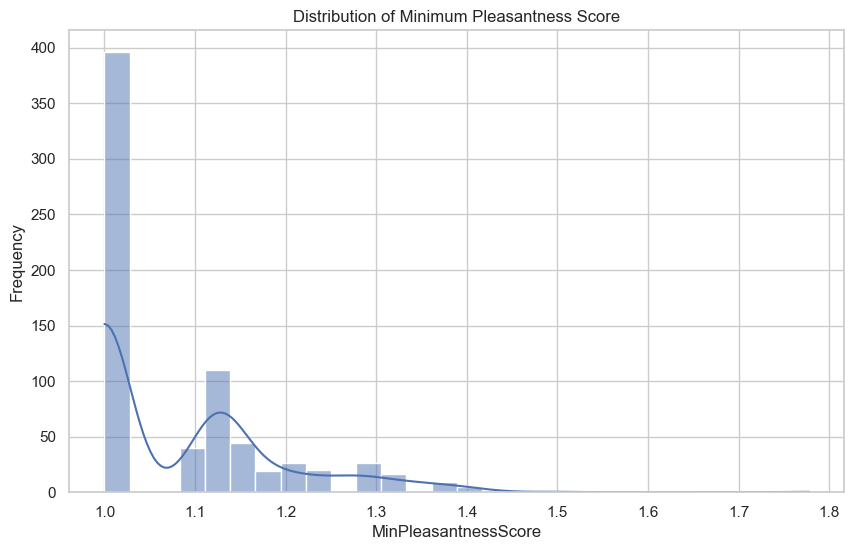

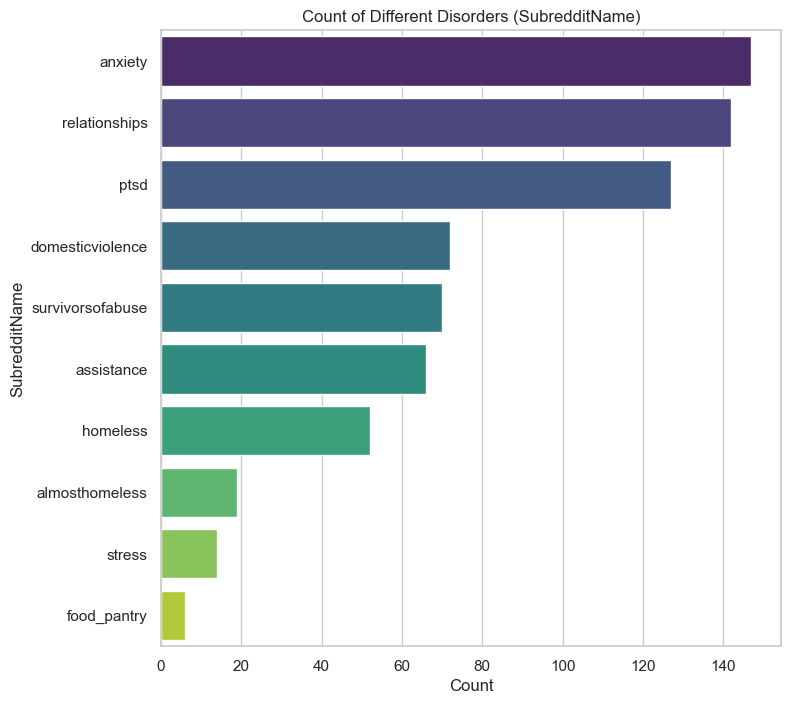

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of a numerical feature
plt.figure(figsize=(10, 6))
sns.histplot(df['MinPleasantnessScore'], kde=True)
plt.title('Distribution of Minimum Pleasantness Score')
plt.xlabel('MinPleasantnessScore')
plt.ylabel('Frequency')
plt.show()

# Count of different disorders (SubredditName)
plt.figure(figsize=(8, 8))
sns.countplot(y='SubredditName', data=df, palette='viridis', order=df['SubredditName'].value_counts().index)
plt.title('Count of Different Disorders (SubredditName)')
plt.xlabel('Count')
plt.ylabel('SubredditName')
plt.show()


In [79]:
# Insight 1: Count of posts per disorder
disorder_counts = df['SubredditName'].value_counts()
print("Count of posts per disorder:\n", disorder_counts)

# Insight 2: Average readability score per disorder
avg_readability_per_disorder = df.groupby('SubredditName')['ReadabilityARI'].mean()
print("Average Readability ARI Score per Disorder:\n", avg_readability_per_disorder)

# Insight 3: Average sentiment score per disorder
avg_sentiment_per_disorder = df.groupby('SubredditName')['SentimentScore'].mean()
print("Average Sentiment Score per Disorder:\n", avg_sentiment_per_disorder)




Count of posts per disorder:
 SubredditName
anxiety             147
relationships       142
ptsd                127
domesticviolence     72
survivorsofabuse     70
assistance           66
homeless             52
almosthomeless       19
stress               14
food_pantry           6
Name: count, dtype: int64
Average Readability ARI Score per Disorder:
 SubredditName
almosthomeless      6.077762
anxiety             4.872128
assistance          4.792106
domesticviolence    4.172531
food_pantry         4.282416
homeless            3.394155
ptsd                5.381181
relationships       4.234458
stress              3.794350
survivorsofabuse    5.373220
Name: ReadabilityARI, dtype: float64
Average Sentiment Score per Disorder:
 SubredditName
almosthomeless      0.089096
anxiety             0.047313
assistance          0.106162
domesticviolence   -0.002058
food_pantry         0.068193
homeless            0.070890
ptsd                0.027924
relationships       0.047419
stress             

In [81]:
#Disorder Prevalence:

#The most frequently discussed disorders are anxiety (147 posts) and relationships (142 posts).
#Disorders like stress (14 posts) and food_pantry (6 posts) have relatively fewer posts.

#Readability:

#Posts in the almosthomeless subreddit have the highest average readability score (6.08), indicating that they might be slightly more complex to read.
#Posts in the homeless subreddit have the lowest average readability score (3.39), indicating simpler language use.

#Sentiment:

#The assistance subreddit has the highest average sentiment score (0.106), suggesting more positive language.
#The stress subreddit has a negative average sentiment score (-0.049), indicating more negative sentiment in the posts.

In [83]:

df.describe().to_csv('/Users/maitri/Documents/ml internship/datasets for research/summary_statistics.csv')


disorder_counts.to_csv('/Users/maitri/Documents/ml internship/datasets for research/disorder_counts.csv')
avg_readability_per_disorder.to_csv('/Users/maitri/Documents/ml internship/datasets for research/avg_readability_per_disorder.csv')
avg_sentiment_per_disorder.to_csv('/Users/maitri/Documents/ml internship/datasets for research/avg_sentiment_per_disorder.csv')


In [77]:
#Analyze how the length of posts varies across different disorders.

In [99]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


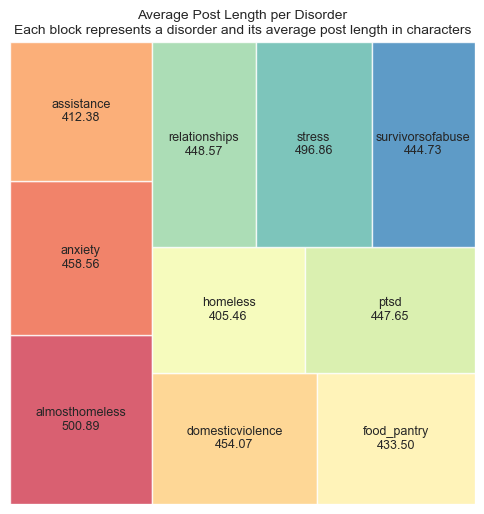

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


df = pd.read_csv('/Users/maitri/Documents/ml internship/datasets for research/dreaddit-train.csv')

df['PostLength'] = df['PostText'].apply(len)
avg_post_length_per_disorder = df.groupby('SubredditName')['PostLength'].mean()

plt.figure(figsize=(6, 6))
color_palette = sns.color_palette("Spectral", len(avg_post_length_per_disorder))
squarify.plot(sizes=avg_post_length_per_disorder.values, 
              label=[f"{label}\n{value:.2f}" for label, value in zip(avg_post_length_per_disorder.index, avg_post_length_per_disorder.values)], 
              color=color_palette, 
              alpha=0.8,
              text_kwargs={'fontsize':9})

plt.title('Average Post Length per Disorder\nEach block represents a disorder and its average post length in characters', fontsize=10)
plt.axis('off')
plt.show()


In [121]:

readability_sentiment_correlation = df.groupby('SubredditName')[['ReadabilityARI', 'SentimentScore']].corr().iloc[0::2, -1]

readability_sentiment_correlation.to_csv('/Users/maitri/Documents/ml internship/datasets for research/readability_sentiment_correlation.csv')

print(readability_sentiment_correlation)


SubredditName                   
almosthomeless    ReadabilityARI   -0.019344
anxiety           ReadabilityARI    0.009946
assistance        ReadabilityARI    0.087665
domesticviolence  ReadabilityARI    0.032210
food_pantry       ReadabilityARI    0.492333
homeless          ReadabilityARI   -0.006043
ptsd              ReadabilityARI    0.165842
relationships     ReadabilityARI    0.139667
stress            ReadabilityARI    0.020472
survivorsofabuse  ReadabilityARI   -0.058653
Name: SentimentScore, dtype: float64


In [125]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def get_top_words(texts, n=10):
    words = ' '.join(texts).split()
    words = [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]
    return Counter(words).most_common(n)

top_words_per_disorder = df.groupby('SubredditName')['PostText'].apply(lambda x: get_top_words(x))

flattened_words = []
for disorder, words in top_words_per_disorder.items():
    for word, count in words:
        flattened_words.append([disorder, word, count])

top_words_df = pd.DataFrame(flattened_words, columns=['SubredditName', 'Word', 'Count'])
top_words_df.to_csv('/Users/maitri/Documents/ml internship/datasets for research/top_words_per_disorder.csv', index=False)

print(top_words_df)


       SubredditName   Word  Count
0     almosthomeless    I'm     17
1     almosthomeless   just      9
2     almosthomeless   home      9
3     almosthomeless  don't      7
4     almosthomeless   like      7
..               ...    ...    ...
95  survivorsofabuse    me.     14
96  survivorsofabuse   feel     14
97  survivorsofabuse   time     13
98  survivorsofabuse    me,     12
99  survivorsofabuse    did     11

[100 rows x 3 columns]


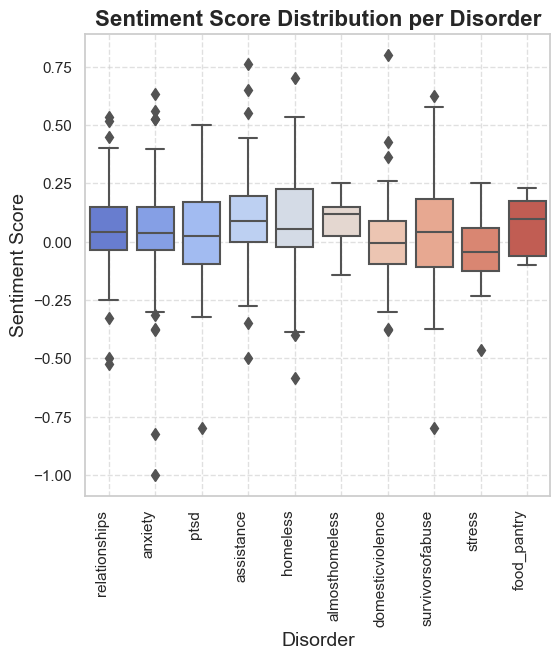

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
box_plot = sns.boxplot(
    x='SubredditName',
    y='SentimentScore',
    data=df,
    palette='coolwarm',  
    fliersize=6,  
    linewidth=1.5
)

plt.title('Sentiment Score Distribution per Disorder', fontsize=16, fontweight='bold')
plt.xlabel('Disorder', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.xticks(rotation=90, ha='right')  

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()



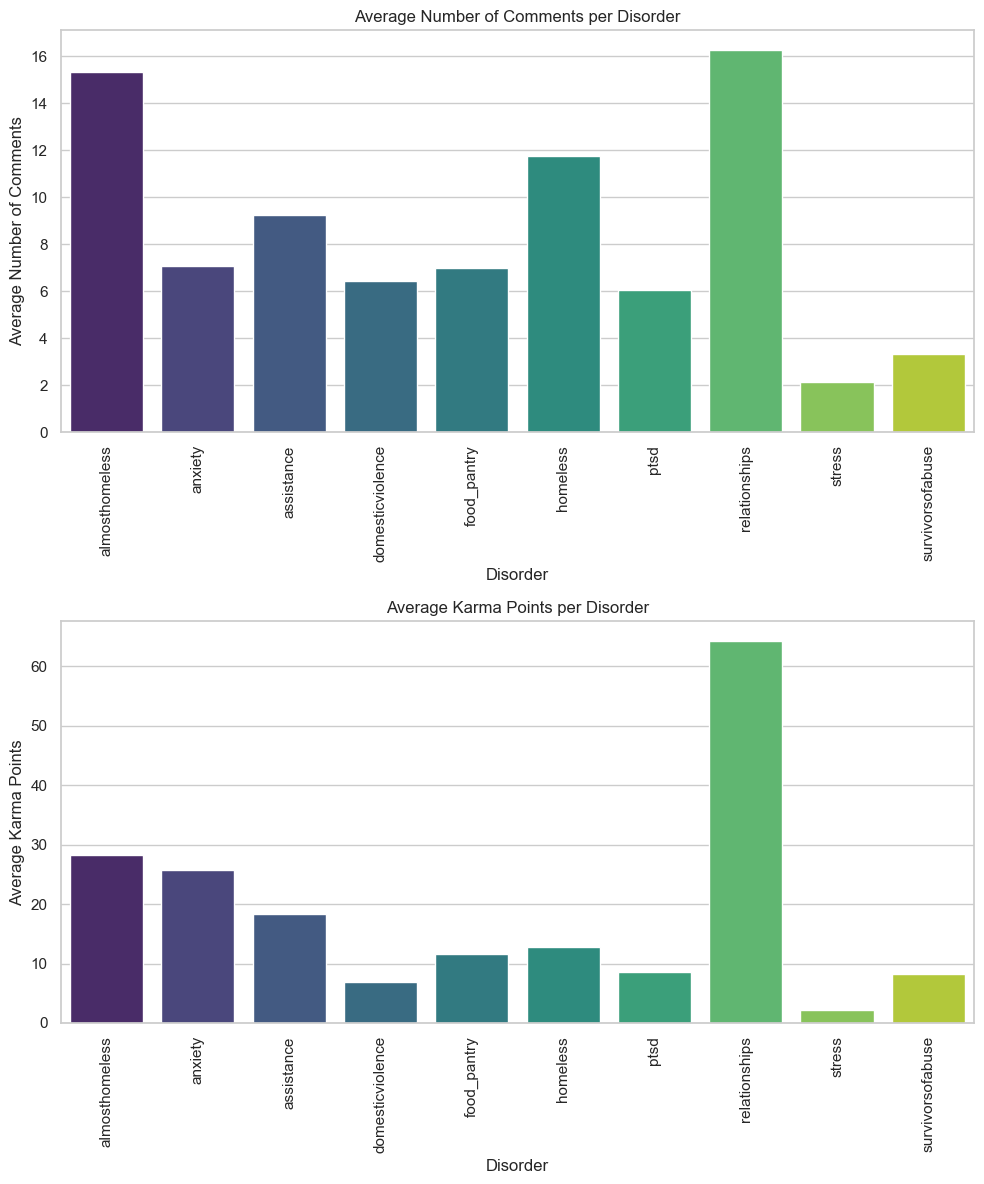

In [135]:
avg_comments_per_disorder = df.groupby('SubredditName')['NumComments'].mean()
avg_karma_per_disorder = df.groupby('SubredditName')['KarmaPoints'].mean()

avg_comments_per_disorder.to_csv('/Users/maitri/Documents/ml internship/datasets for research/avg_comments_per_disorder.csv')
avg_karma_per_disorder.to_csv('/Users/maitri/Documents/ml internship/datasets for research/avg_karma_per_disorder.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
sns.barplot(x=avg_comments_per_disorder.index, y=avg_comments_per_disorder.values, palette='viridis', ax=axes[0])
axes[0].set_title('Average Number of Comments per Disorder')
axes[0].set_xlabel('Disorder')
axes[0].set_ylabel('Average Number of Comments')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x=avg_karma_per_disorder.index, y=avg_karma_per_disorder.values, palette='viridis', ax=axes[1])
axes[1].set_title('Average Karma Points per Disorder')
axes[1].set_xlabel('Disorder')
axes[1].set_ylabel('Average Karma Points')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each disorder
for disorder in df['SubredditName'].unique():
    text = ' '.join(df[df['SubredditName'] == disorder]['PostText'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=ENGLISH_STOP_WORDS).generate(text)
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {disorder}')
    plt.axis('off')
    plt.show()


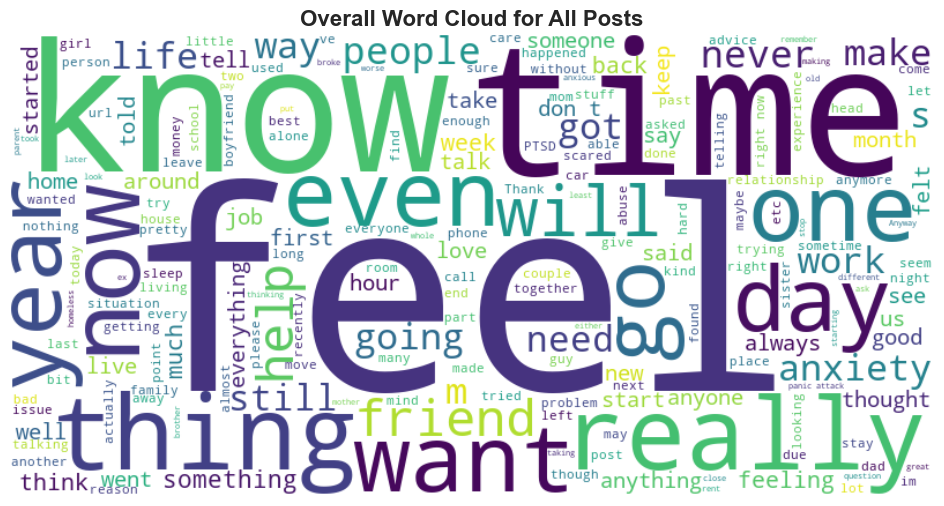

In [149]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data from CSV
df = pd.read_csv('/Users/maitri/Documents/ml internship/datasets for research/dreaddit-train.csv')

# Combine all post texts into a single string
text = ' '.join(df['PostText'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Word Cloud for All Posts', fontsize=16, fontweight='bold')
plt.show()
